# **Quantifying Educational Impacts Under the NYPD's Stop-And-Frisk Era**
CUNY Graduate Center Data Analysis and Visualization Program
* **Student:** Matthew Stanton (414-852-7342, pingstanton@gmail.com, CUNY EMPLID 24371021)
* **Advisor:** Dr. Timothy Shortell, Professor of Sociology, Brooklyn College / CUNY Graduate Center

Presentation: https://pingstanton.com/nypdsqf/
Other Notes: https://chimaboo.com/capstone/

In [ ]:
# Start by loading up the usual suspects...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scp
import matplotlib.ticker as ticker

##Data Sources

Frequency of NYPD Stop-and-Frisk usage on neighborhoods to compare to degrees of Educational Attainment, per census data.

**American Community Survey**\
S1501 Educational Attainment 2010-2023\
by NYC Census Tracts\
https://data.census.gov/

**NYC.gov New York City Police Department**\
NYPD Stop, Question, and Frisk Data\
https://www.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page

Education data from census tracts (2010, 2020 boundaries) were grouped into Precincts (defined by 2024 boundaries). In terms of inconsistencies between 2010 to 2020 census tracts, in most cases the change involved splitting the tract into two or more parts from a previous tract, not changing its associated NYPD Precinct. The major exception to this rule is found on Staten Island, where the 121st Precinct was created in 2013. Census tracts that were divided by boundries were grouped into the precinct of greatest area.

For an illustrative guide, see: https://chimaboo.com/capstone/precinctson2020tracts.htm

In [ ]:
# NYPD SQF data only, no census educational achievement data...
df2003 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqf2003.csv')
df2004 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqf2004.csv')
df2005 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqf2005.csv')
df2006 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqf2006.csv')
df2007 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqf2007.csv')
df2008 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqf2008.csv')
df2009 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqf2009.csv')

# NYPD SQF and CENSUS EDU data by year...
df2010 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2010.csv')
df2011 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2011.csv')
df2012 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2012.csv')
df2013 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2013.csv')
df2014 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2014.csv')
df2015 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2015.csv')
df2016 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2016.csv')
df2017 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2017.csv')
df2018 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2018.csv')
df2019 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2019.csv')
df2020 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2020.csv')
df2021 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2021.csv')
df2022 = pd.read_csv('https://chimaboo.com/capstone/dataset26/nypdsqfEdu2022.csv')



##Data Dictionary/Codebook

YEAR (year of collected data)\
*NYPD Stop, Question, and Frisk Data...*\
PRECINCT (NYPD precinct of reported incident)\
SQF_SEXF (sex: female)\
SQF_SEXM (sex: male)\
SQF_SEXZ (sex: other or unlisted)\
SQF_RACEASIAN (race: Asian)\
SQF_RACEBLACK (race: Black)\
SQF_RACENATIVE (race: Native American/Indigenous)\
SQF_RACEHISPB (race: Hispanic/Black)\
SQF_RACEHISPW (race: Hispanic/White)\
SQF_RACEUNK1 (race: unknown or unlisted)\
SQF_RACEWHITE (race: White)\
SQF_RACEUNK2 (race: unknown or unlisted)\
SQF_RACEOTHER (race: other)\
SQF_AGE0_17 (bin created for age: 17 or younger)\
SQF_AGE18_24 (bin created for age: 18 to age: 24)\
SQF_AGE25_34 (bin created for age: 25 to age: 34)\
SQF_AGE35_44 (bin created for age: 35 to age: 44)\
SQF_AGE45_64 (bin created for age: 45 to age: 64)\
SQF_AGE65_older (bin created for age: 65 or older)

Note: NYPD data lists specific ages. Bins were created for this dataset to coincide with how educational data sums are grouped below.

*American Community Survey S1501 Educational Attainment 2010-2023 Data...*

POP_AGE18_24 (age: 18 to 24)\
POP_AGE18_24_M (age: 18 to 24, sex: male)\
POP_AGE18_24_F (age: 18 to 24, sex: female)\
POP_25OVER (age: 25 or older)\
POP_25OVER_M (age: 25 or older, sex: male)\
POP_25OVER_F (age: 25 or older, sex: female)\
UNDERHS_AGE18to24 (max. educational attainment: under 9th grade, ages: 18-24)\
GRAD_AGE18to24 (max. educational attainment: high school graduate, ages: 18-24)\
COLLEGE_AGE18to24 (max. educational attainment: some college, no degree, ages: 18-24)\
BACHELORS_AGE18to24 (max. educational attainment: bachelor's degree or higher, ages: 18-24)\
UNDERHS_AGE18to24_M (max. educational attainment: under 9th grade, ages: 18-24, sex: male)\
GRAD_AGE18to24_M (max. educational attainment: high school graduate, ages: 18-24, sex: male)\
COLLEGE_AGE18to24_M (max. educational attainment: some college, no degree, ages: 18-24, sex: male)\
BACHELORS_AGE18to24_M (max. educational attainment: bachelor's degree or higher, ages: 18-24, sex: male)\
UNDERHS_AGE18to24_F (max. educational attainment: under 9th grade, ages: 18-24, sex: female)\
GRAD_AGE18to24_F (max. educational attainment: high school graduate, ages: 18-24, sex: female)\
COLLEGE_AGE18to24_F (max. educational attainment: some college, no degree, ages: 18-24, sex: female)\
BACHELORS_AGE18to24_F (max. educational attainment: bachelor's degree or higher, ages: 18-24, sex: female)\
UNDER9th_25OVER_M (max. educational attainment: under 9th grade, ages: 25 or older, sex: male)\
UNDERHS_25OVER_M (max. educational attainment: high school, no graduation, ages: 25 or older, sex: male)\
GRAD_25OVER_M (max. educational attainment: high school degree or equivalent, ages: 25 or older, sex: male)\
COLLEGE_25OVER_M (max. educational attainment: some college, ages: 25 or older, sex: male)\
BACHELORS_25OVER_M (max. educational attainment: bachelor's degree or higher, ages: 25 or older, sex: male)\
UNDER9th_25OVER_F (max. educational attainment: under 9th grade, ages: 25 or older, sex: female)\
UNDERHS_25OVER_F (max. educational attainment: high school, no graduation, ages: 25 or older, sex: female)\
GRAD_25OVER_F (max. educational attainment: high school degree or equivalent, ages: 25 or older, sex: female)\
COLLEGE_25OVER_F (max. educational attainment: some college, ages: 25 or older, sex: female)\
BACHELORS_25OVER_F (max. educational attainment: bachelor's degree or higher, ages: 25 or older, sex: female)

In [ ]:
# dataframe for NYPD and educational attainment comparisons...
dataframesEDU = [df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022]
df = pd.concat(dataframesEDU, ignore_index=True)
df.head()

,YEAR,PRECINCT,SQF_SEXF,SQF_SEXM,SQF_SEXZ,SQF_RACEASIAN,SQF_RACEBLACK,SQF_RACENATIVE,SQF_RACEHISPB,SQF_RACEHISPW,...,UNDER9th_25OVER_M,UNDERHS_25OVER_M,GRAD_25OVER_M,COLLEGE_25OVER_M,BACHELORS_25OVER_M,UNDER9th_25OVER_F,UNDERHS_25OVER_F,GRAD_25OVER_F,COLLEGE_25OVER_F,BACHELORS_25OVER_F
0,2010.0,1.0,205.0,2240.0,1.0,92.0,1495.0,12.0,100.0,405.0,...,131.0,232.0,1056.0,1354.0,6504.0,352.0,228.0,937.0,1123.0,7233.0
1,2010.0,5.0,322.0,2502.0,47.0,376.0,1197.0,8.0,189.0,635.0,...,3532.0,1902.0,3361.0,1724.0,4837.0,4938.0,2001.0,3197.0,1329.0,4319.0
2,2010.0,6.0,227.0,3224.0,82.0,79.0,1986.0,10.0,144.0,528.0,...,278.0,306.0,1328.0,1770.0,9519.0,230.0,345.0,1346.0,1677.0,10944.0
3,2010.0,7.0,198.0,2970.0,56.0,120.0,1105.0,6.0,340.0,1088.0,...,5109.0,3202.0,5289.0,2664.0,4120.0,7852.0,2922.0,6117.0,2487.0,4082.0
4,2010.0,9.0,406.0,4672.0,99.0,110.0,1771.0,12.0,471.0,1477.0,...,1761.0,1875.0,3953.0,3098.0,10132.0,3001.0,1941.0,3277.0,2751.0,8770.0


In [ ]:
# dataframe for NYPD stop-and-frisk only comparisons...
dataframesNYPD = [df2003, df2004, df2005, df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022]
dfNYPD = pd.concat(dataframesNYPD, ignore_index=True)
df.head()

,YEAR,PRECINCT,SQF_SEXF,SQF_SEXM,SQF_SEXZ,SQF_RACEASIAN,SQF_RACEBLACK,SQF_RACENATIVE,SQF_RACEHISPB,SQF_RACEHISPW,...,UNDER9th_25OVER_M,UNDERHS_25OVER_M,GRAD_25OVER_M,COLLEGE_25OVER_M,BACHELORS_25OVER_M,UNDER9th_25OVER_F,UNDERHS_25OVER_F,GRAD_25OVER_F,COLLEGE_25OVER_F,BACHELORS_25OVER_F
0,2010.0,1.0,205.0,2240.0,1.0,92.0,1495.0,12.0,100.0,405.0,...,131.0,232.0,1056.0,1354.0,6504.0,352.0,228.0,937.0,1123.0,7233.0
1,2010.0,5.0,322.0,2502.0,47.0,376.0,1197.0,8.0,189.0,635.0,...,3532.0,1902.0,3361.0,1724.0,4837.0,4938.0,2001.0,3197.0,1329.0,4319.0
2,2010.0,6.0,227.0,3224.0,82.0,79.0,1986.0,10.0,144.0,528.0,...,278.0,306.0,1328.0,1770.0,9519.0,230.0,345.0,1346.0,1677.0,10944.0
3,2010.0,7.0,198.0,2970.0,56.0,120.0,1105.0,6.0,340.0,1088.0,...,5109.0,3202.0,5289.0,2664.0,4120.0,7852.0,2922.0,6117.0,2487.0,4082.0
4,2010.0,9.0,406.0,4672.0,99.0,110.0,1771.0,12.0,471.0,1477.0,...,1761.0,1875.0,3953.0,3098.0,10132.0,3001.0,1941.0,3277.0,2751.0,8770.0


In [ ]:
#doublechecking NYPD stop-and-frisk sums...
df["SQF_SEXALL"] = df["SQF_SEXF"] + df["SQF_SEXM"] + df["SQF_SEXZ"]
df["SQF_RACEALL"] = df["SQF_RACEASIAN"] + df["SQF_RACEBLACK"] + df["SQF_RACENATIVE"] + df["SQF_RACEHISPB"] + df["SQF_RACEHISPW"] + df["SQF_RACEUNK1"] + df["SQF_RACEWHITE"] + df["SQF_RACEUNK2"] + df["SQF_RACEOTHER"]
df["SQF_AGEALL"] = df["SQF_AGE0_17"] + df["SQF_AGE18_24"] + df["SQF_AGE25_34"] + df["SQF_AGE35_44"] + df["SQF_AGE45_64"] + df["SQF_AGE65_older"]
df["SQF_AGEYOUTH"] = df["SQF_AGE0_17"] + df["SQF_AGE18_24"]
dfNYPD["SQF_SEXALL"] = dfNYPD["SQF_SEXF"] + dfNYPD["SQF_SEXM"] + dfNYPD["SQF_SEXZ"]
dfNYPD["SQF_RACEALL"] = df["SQF_RACEASIAN"] + dfNYPD["SQF_RACEBLACK"] + dfNYPD["SQF_RACENATIVE"] + dfNYPD["SQF_RACEHISPB"] + dfNYPD["SQF_RACEHISPW"] + dfNYPD["SQF_RACEUNK1"] + dfNYPD["SQF_RACEWHITE"] + dfNYPD["SQF_RACEUNK2"] + dfNYPD["SQF_RACEOTHER"]
dfNYPD["SQF_AGEALL"] = df["SQF_AGE0_17"] + dfNYPD["SQF_AGE18_24"] + dfNYPD["SQF_AGE25_34"] + dfNYPD["SQF_AGE35_44"] + dfNYPD["SQF_AGE45_64"] + dfNYPD["SQF_AGE65_older"]
dfNYPD["SQF_AGEYOUTH"] = dfNYPD["SQF_AGE0_17"] + dfNYPD["SQF_AGE18_24"]

# combining NYPD identifications "Hispanic Black" and "Hispanic White" into just one combined "Hispanic" variable...
df["SQF_RACEHISPANIC"] = df["SQF_RACEHISPB"] + df["SQF_RACEHISPW"]
dfNYPD["SQF_RACEHISPANIC"] = dfNYPD["SQF_RACEHISPB"] + dfNYPD["SQF_RACEHISPW"]

# creating an average number stops per NYPD precinct, minimizing gaps in missing data from sex/age/race records...
df["SQF_MEAN"] = df[["SQF_SEXALL", "SQF_RACEALL", "SQF_AGEALL"]].mean(axis=1)
dfNYPD["SQF_MEAN"] = dfNYPD[["SQF_SEXALL", "SQF_RACEALL", "SQF_AGEALL"]].mean(axis=1)

# sum of census populations (18 and older) based on American Community Survey estimates...
df["POP_Adult"] = df["POP_AGE18_24"] + df["POP_25OVER"]
df["POP_Male"] = df["POP_AGE18_24_M"] + df["POP_25OVER_M"]
df["POP_Female"] = df["POP_AGE18_24_F"] + df["POP_25OVER_F"]

# create all-age educational attainment variable...
df["UNDERHS_ALL"] = df["UNDERHS_AGE18to24"] + df["UNDER9th_25OVER"] + df["UNDER9th_25OVER"]
df["GRAD_ALL"] = df["GRAD_AGE18to24"] + df["GRAD_25OVER"]
df["COLLEGE_ALL"] = df["COLLEGE_AGE18to24"] + df["COLLEGE_25OVER"]
df["BACHELORS_ALL"] = df["BACHELORS_AGE18to24"] + df["BACHELORS_25OVER"]
df["UNDERHS_ALL_M"] = df["UNDERHS_AGE18to24_M"] + df["UNDER9th_25OVER_M"] + df["UNDER9th_25OVER_M"]
df["GRAD_ALL_M"] = df["GRAD_AGE18to24_M"] + df["GRAD_25OVER_M"]
df["COLLEGE_ALL_M"] = df["COLLEGE_AGE18to24_M"] + df["COLLEGE_25OVER_M"]
df["BACHELORS_ALL_M"] = df["BACHELORS_AGE18to24_M"] + df["BACHELORS_25OVER_M"]
df["UNDERHS_ALL_F"] = df["UNDERHS_AGE18to24_F"] + df["UNDER9th_25OVER_F"] + df["UNDER9th_25OVER_F"]
df["GRAD_ALL_F"] = df["GRAD_AGE18to24_F"] + df["GRAD_25OVER_F"]
df["COLLEGE_ALL_F"] = df["COLLEGE_AGE18to24_F"] + df["COLLEGE_25OVER_F"]
df["BACHELORS_ALL_F"] = df["BACHELORS_AGE18to24_F"] + df["BACHELORS_25OVER_F"]

# creating a percentage of no high school graduation...
df["POP_EDU"] = df["POP_AGE18_24"] + df["POP_25OVER"]
df["POP_EDU_M"] = df["POP_AGE18_24_M"] + df["POP_25OVER_M"]
df["POP_EDU_F"] = df["POP_AGE18_24_F"] + df["POP_25OVER_F"]
df["EDU_UNDERHS"] = df["UNDERHS_AGE18to24"] + df["UNDERHS_25OVER"]
df["EDU_UNDERHS_M"] = df["UNDERHS_AGE18to24_M"] + df["UNDERHS_25OVER_M"]
df["EDU_UNDERHS_F"] = df["UNDERHS_AGE18to24_F"] + df["UNDERHS_25OVER_F"]
df["EDU18to24_UNDERHS_PCT"] = df["UNDERHS_AGE18to24"] / df["POP_AGE18_24"]
df["EDU18to24_UNDERHS_PCT_M"] = df["UNDERHS_AGE18to24_M"] / df["POP_AGE18_24_M"]
df["EDU18to24_UNDERHS_PCT_F"] = df["UNDERHS_AGE18to24_F"] / df["POP_AGE18_24_F"]
df["EDU25OVER_UNDERHS_PCT"] = df["UNDERHS_25OVER"] / df["POP_25OVER_F"]
df["EDU25OVER_UNDERHS_PCT_M"] = df["UNDERHS_25OVER_M"] / df["POP_25OVER_M"]
df["EDU25OVER_UNDERHS_PCT_F"] = df["UNDERHS_25OVER_F"] / df["POP_25OVER_F"]
df["EDU_UNDERHS_PCT"] = df["EDU_UNDERHS"] / df["POP_EDU"]
df["EDU_UNDERHS_PCT_M"] = df["EDU_UNDERHS_M"] / df["POP_EDU_M"]
df["EDU_UNDERHS_PCT_F"] = df["EDU_UNDERHS_F"] / df["POP_EDU_F"]

# percentage of stops by race...
df["SQF_ASIAN_PCT"] = df["SQF_RACEASIAN"] / df["SQF_RACEALL"]
df["SQF_BLACK_PCT"] = df["SQF_RACEBLACK"] / df["SQF_RACEALL"]
df["SQF_HISPANIC_PCT"] = df["SQF_RACEHISPANIC"] / df["SQF_RACEALL"]
df["SQF_WHITE_PCT"] = df["SQF_RACEWHITE"] / df["SQF_RACEALL"]
dfNYPD["SQF_ASIAN_PCT"] = dfNYPD["SQF_RACEASIAN"] / dfNYPD["SQF_RACEALL"]
dfNYPD["SQF_BLACK_PCT"] = dfNYPD["SQF_RACEBLACK"] / dfNYPD["SQF_RACEALL"]
dfNYPD["SQF_HISPANIC_PCT"] = dfNYPD["SQF_RACEHISPANIC"] / dfNYPD["SQF_RACEALL"]
dfNYPD["SQF_WHITE_PCT"] = dfNYPD["SQF_RACEWHITE"] / dfNYPD["SQF_RACEALL"]



In [ ]:
# educational annual totals...

eduUnderHS18_24_by_year = df.groupby('YEAR') [["UNDERHS_AGE18to24"]].sum()
eduGradHS18_24_by_year = df.groupby('YEAR') [["GRAD_AGE18to24"]].sum()
eduCollege18_24_by_year = df.groupby('YEAR') [["COLLEGE_AGE18to24"]].sum()
eduBachelors18_24_by_year = df.groupby('YEAR') [["BACHELORS_AGE18to24"]].sum()

eduAdults = round(df.groupby('YEAR') [["POP_Adult"]].sum(),0)
eduMales = round(df.groupby('YEAR') [["POP_Male"]].sum(),0)
eduFemales = round(df.groupby('YEAR') [["POP_Female"]].sum(),0)
eduunderHS = round(df.groupby('YEAR') [["UNDERHS_ALL"]].sum(),0)
eduGradHS = round(df.groupby('YEAR') [["GRAD_ALL"]].sum(),0)
eduCollege = round(df.groupby('YEAR') [["COLLEGE_ALL"]].sum(),0)
eduBachelors = round(df.groupby('YEAR') [["BACHELORS_ALL"]].sum(),0)

edupop_18_24_years = round(df.groupby('YEAR') [["POP_AGE18_24"]].sum(),0)
edupop_25over_years = round(df.groupby('YEAR') [["POP_25OVER"]].sum(),0)

eduUnderHS18to24 = round(df.groupby('YEAR') [["UNDERHS_AGE18to24"]].sum(),0)
eduGradHS18to24 = round(df.groupby('YEAR') [["GRAD_AGE18to24"]].sum(),0)
eduCollege18to24 = round(df.groupby('YEAR') [["COLLEGE_AGE18to24"]].sum(),0)
eduBachelors18to24 = round(df.groupby('YEAR') [["BACHELORS_AGE18to24"]].sum(),0)

eduUnderHS18to24_M = round(df.groupby('YEAR') [["UNDERHS_AGE18to24_M"]].sum(),0)
eduGradHS18to24_M = round(df.groupby('YEAR') [["GRAD_AGE18to24_M"]].sum(),0)
eduCollege18to24_M = round(df.groupby('YEAR') [["COLLEGE_AGE18to24_M"]].sum(),0)
eduBachelors18to24_M = round(df.groupby('YEAR') [["BACHELORS_AGE18to24_M"]].sum(),0)

eduUnderHS18to24_F = round(df.groupby('YEAR') [["UNDERHS_AGE18to24_F"]].sum(),0)
eduGradHS18to24_F = round(df.groupby('YEAR') [["GRAD_AGE18to24_F"]].sum(),0)
eduCollege18to24_F = round(df.groupby('YEAR') [["COLLEGE_AGE18to24_F"]].sum(),0)
eduBachelors18to24_F = round(df.groupby('YEAR') [["BACHELORS_AGE18to24_F"]].sum(),0)

eduUnder9th25over = round(df.groupby('YEAR') [["UNDER9th_25OVER"]].sum(),0)
eduUnderHS25over = round(df.groupby('YEAR') [["UNDERHS_25OVER"]].sum(),0)
eduGradHS25over = round(df.groupby('YEAR') [["GRAD_25OVER"]].sum(),0)
eduCollege25over = round(df.groupby('YEAR') [["COLLEGE_25OVER"]].sum(),0)
eduBachelors25over = round(df.groupby('YEAR') [["BACHELORS_25OVER"]].sum(),0)

eduUnder9th25over_M = round(df.groupby('YEAR') [["UNDER9th_25OVER_M"]].sum(),0)
eduUnderHS25over_M = round(df.groupby('YEAR') [["UNDERHS_25OVER_M"]].sum(),0)
eduGradHS25over_M = round(df.groupby('YEAR') [["GRAD_25OVER_M"]].sum(),0)
eduCollege25over_M = round(df.groupby('YEAR') [["COLLEGE_25OVER_M"]].sum(),0)
eduBachelors25over_M = round(df.groupby('YEAR') [["BACHELORS_25OVER_M"]].sum(),0)

eduUnder9th25over_F = round(df.groupby('YEAR') [["UNDER9th_25OVER_F"]].sum(),0)
eduUnderHS25over_F = round(df.groupby('YEAR') [["UNDERHS_25OVER_F"]].sum(),0)
eduGradHS25over_F = round(df.groupby('YEAR') [["GRAD_25OVER_F"]].sum(),0)
eduCollege25over_F = round(df.groupby('YEAR') [["COLLEGE_25OVER_F"]].sum(),0)
eduBachelors25over_F = round(df.groupby('YEAR') [["BACHELORS_25OVER_F"]].sum(),0)

In [ ]:
SQFasian_by_year = df.groupby('YEAR') [["SQF_RACEASIAN"]].sum()
SQFblack_by_year = df.groupby('YEAR') [["SQF_RACEBLACK"]].sum()
SQFhispanic_by_year = df.groupby('YEAR') [["SQF_RACEHISPANIC"]].sum()
SQFwhite_by_year = df.groupby('YEAR') [["SQF_RACEWHITE"]].sum()
SQFmale_by_year = df.groupby('YEAR') [["SQF_SEXM"]].sum()
SQFfemale_by_year = df.groupby('YEAR') [["SQF_SEXF"]].sum()
SQFothersex_by_year = df.groupby('YEAR') [["SQF_SEXZ"]].sum()

SQF0to17_by_year = df.groupby('YEAR') [["SQF_AGE0_17"]].sum()
SQF18to24_by_year = df.groupby('YEAR') [["SQF_AGE18_24"]].sum()
SQF25to34_by_year = df.groupby('YEAR') [["SQF_AGE25_34"]].sum()
SQF35to44_by_year = df.groupby('YEAR') [["SQF_AGE35_44"]].sum()
SQF45to64_by_year = df.groupby('YEAR') [["SQF_AGE45_64"]].sum()
SQF65up_by_year = df.groupby('YEAR') [["SQF_AGE65_older"]].sum()


In [ ]:
# grab data by all years...
dataByYear = [eduUnderHS18_24_by_year, eduGradHS18_24_by_year, eduCollege18_24_by_year, eduBachelors18_24_by_year, eduAdults, eduMales, eduFemales, eduunderHS, eduGradHS, eduCollege, eduBachelors, edupop_18_24_years, edupop_25over_years, eduUnderHS18to24, eduGradHS18to24, eduCollege18to24, eduBachelors18to24, eduUnderHS18to24_M, eduGradHS18to24_M, eduCollege18to24_M, eduBachelors18to24_M, eduUnderHS18to24_F, eduGradHS18to24_F, eduCollege18to24_F, eduBachelors18to24_F, eduUnder9th25over, eduUnderHS25over, eduGradHS25over, eduCollege25over, eduBachelors25over, eduUnder9th25over_M, eduUnderHS25over_M, eduGradHS25over_M, eduCollege25over_M, eduBachelors25over_M, eduUnder9th25over_F, eduUnderHS25over_F, eduGradHS25over_F, eduCollege25over_F, eduBachelors25over_F, SQFasian_by_year, SQFblack_by_year, SQFhispanic_by_year, SQFwhite_by_year, SQFmale_by_year, SQFfemale_by_year, SQFothersex_by_year, SQF0to17_by_year, SQF18to24_by_year, SQF25to34_by_year, SQF35to44_by_year, SQF45to64_by_year, SQF65up_by_year]
df_allYears = pd.concat(dataByYear, axis=1) # Concatenate along columns (axis=1)
df_allYears.to_csv('allYears.csv', index=True)
from google.colab import files
files.download('allYears.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# educational totals by precinct...

eduUnderHS18_24_by_precinct = df.groupby('PRECINCT') [["UNDERHS_AGE18to24"]].sum()
eduGradHS18_24_by_precinct = df.groupby('PRECINCT') [["GRAD_AGE18to24"]].sum()
eduCollege18_24_by_precinct = df.groupby('PRECINCT') [["COLLEGE_AGE18to24"]].sum()
eduBachelors18_24_by_precinct = df.groupby('PRECINCT') [["BACHELORS_AGE18to24"]].sum()

eduAdults_by_precinct = round(df.groupby('PRECINCT') [["POP_Adult"]].sum(),0)
eduMales_by_precinct = round(df.groupby('PRECINCT') [["POP_Male"]].sum(),0)
eduFemales_by_precinct = round(df.groupby('PRECINCT') [["POP_Female"]].sum(),0)
eduunderHS_by_precinct = round(df.groupby('PRECINCT') [["UNDERHS_ALL"]].sum(),0)
eduGradHS_by_precinct = round(df.groupby('PRECINCT') [["GRAD_ALL"]].sum(),0)
eduCollege_by_precinct = round(df.groupby('PRECINCT') [["COLLEGE_ALL"]].sum(),0)
eduBachelors_by_precinct = round(df.groupby('PRECINCT') [["BACHELORS_ALL"]].sum(),0)

edupop_18_24_years_by_precinct = round(df.groupby('PRECINCT') [["POP_AGE18_24"]].sum(),0)
edupop_25over_years_by_precinct = round(df.groupby('PRECINCT') [["POP_25OVER"]].sum(),0)

eduUnderHS18to24_by_precinct = round(df.groupby('PRECINCT') [["UNDERHS_AGE18to24"]].sum(),0)
eduGradHS18to24_by_precinct = round(df.groupby('PRECINCT') [["GRAD_AGE18to24"]].sum(),0)
eduCollege18to24_by_precinct = round(df.groupby('PRECINCT') [["COLLEGE_AGE18to24"]].sum(),0)
eduBachelors18to24_by_precinct = round(df.groupby('PRECINCT') [["BACHELORS_AGE18to24"]].sum(),0)

eduUnderHS18to24_M_by_precinct = round(df.groupby('PRECINCT') [["UNDERHS_AGE18to24_M"]].sum(),0)
eduGradHS18to24_M_by_precinct = round(df.groupby('PRECINCT') [["GRAD_AGE18to24_M"]].sum(),0)
eduCollege18to24_M_by_precinct = round(df.groupby('PRECINCT') [["COLLEGE_AGE18to24_M"]].sum(),0)
eduBachelors18to24_M_by_precinct = round(df.groupby('PRECINCT') [["BACHELORS_AGE18to24_M"]].sum(),0)

eduUnderHS18to24_F_by_precinct = round(df.groupby('PRECINCT') [["UNDERHS_AGE18to24_F"]].sum(),0)
eduGradHS18to24_F_by_precinct = round(df.groupby('PRECINCT') [["GRAD_AGE18to24_F"]].sum(),0)
eduCollege18to24_F_by_precinct = round(df.groupby('PRECINCT') [["COLLEGE_AGE18to24_F"]].sum(),0)
eduBachelors18to24_F_by_precinct = round(df.groupby('PRECINCT') [["BACHELORS_AGE18to24_F"]].sum(),0)

eduUnder9th25over_by_precinct = round(df.groupby('PRECINCT') [["UNDER9th_25OVER"]].sum(),0)
eduUnderHS25over_by_precinct = round(df.groupby('PRECINCT') [["UNDERHS_25OVER"]].sum(),0)
eduGradHS25over_by_precinct = round(df.groupby('PRECINCT') [["GRAD_25OVER"]].sum(),0)
eduCollege25over_by_precinct = round(df.groupby('PRECINCT') [["COLLEGE_25OVER"]].sum(),0)
eduBachelors25over_by_precinct = round(df.groupby('PRECINCT') [["BACHELORS_25OVER"]].sum(),0)

eduUnder9th25over_M_by_precinct = round(df.groupby('PRECINCT') [["UNDER9th_25OVER_M"]].sum(),0)
eduUnderHS25over_M_by_precinct = round(df.groupby('PRECINCT') [["UNDERHS_25OVER_M"]].sum(),0)
eduGradHS25over_M_by_precinct = round(df.groupby('PRECINCT') [["GRAD_25OVER_M"]].sum(),0)
eduCollege25over_M_by_precinct = round(df.groupby('PRECINCT') [["COLLEGE_25OVER_M"]].sum(),0)
eduBachelors25over_M_by_precinct = round(df.groupby('PRECINCT') [["BACHELORS_25OVER_M"]].sum(),0)

eduUnder9th25over_F_by_precinct = round(df.groupby('PRECINCT') [["UNDER9th_25OVER_F"]].sum(),0)
eduUnderHS25over_F_by_precinct = round(df.groupby('PRECINCT') [["UNDERHS_25OVER_F"]].sum(),0)
eduGradHS25over_F_by_precinct = round(df.groupby('PRECINCT') [["GRAD_25OVER_F"]].sum(),0)
eduCollege25over_F_by_precinct = round(df.groupby('PRECINCT') [["COLLEGE_25OVER_F"]].sum(),0)
eduBachelors25over_F_by_precinct = round(df.groupby('PRECINCT') [["BACHELORS_25OVER_F"]].sum(),0)

In [ ]:
# percentage of eduunderHS relative to eduAdults grouped by YEAR

eduUnderHS_Pct = (eduunderHS["UNDERHS_ALL"] / eduAdults["POP_Adult"]) * 100

dfEduGrouped = pd.DataFrame({
    "Total Adults": eduAdults["POP_Adult"],
    "Under HS": eduunderHS["UNDERHS_ALL"],
    "Under HS %": eduUnderHS_Pct
})

print(eduUnderHS_Pct)

YEAR
2010.0    21.131440
2011.0    26.489315
2012.0    20.776483
2013.0    20.419988
2014.0    20.102245
2015.0    19.762512
2016.0    19.178195
2017.0    18.980688
2019.0    17.933830
2020.0    17.380948
2021.0    17.194163
2022.0    17.182116
dtype: float64


In [ ]:
# checking updated dataframe...

# df.to_csv('allCheck.csv', index=True)
# from google.colab import files
# files.download('allCheck.csv')

In [ ]:
# Total NYPD stop-and-frisk stops 2010-2022, all precincts by year, niche tallies...
sqf_by_year = round(df.groupby('YEAR') [["SQF_MEAN"]].sum(),0)

sqf_by_year_asians = round(df.groupby('YEAR') [["SQF_RACEASIAN"]].sum(),0)
sqf_by_year_blacks = round(df.groupby('YEAR') [["SQF_RACEBLACK"]].sum(),0)
sqf_by_year_hispanics = round(df.groupby('YEAR') [["SQF_RACEHISPANIC"]].sum(),0)
sqf_by_year_whites = round(df.groupby('YEAR') [["SQF_RACEWHITE"]].sum(),0)
# print(sqf_by_year, sqf_by_year_asians, sqf_by_year_blacks, sqf_by_year_hispanics, sqf_by_year_whites)

sqf_by_year_males = df.groupby('YEAR') [["SQF_SEXM"]].sum()
sqf_by_year_females = df.groupby('YEAR') [["SQF_SEXF"]].sum()
sqf_by_year_other = df.groupby('YEAR') [["SQF_SEXZ"]].sum()
sqf_by_year_age0_17 = df.groupby('YEAR') [["SQF_AGE0_17"]].sum()
sqf_by_year_age18_24 = df.groupby('YEAR') [["SQF_AGE18_24"]].sum()
sqf_by_year_age25_34 = df.groupby('YEAR') [["SQF_AGE25_34"]].sum()
sqf_by_year_age35_44 = df.groupby('YEAR') [["SQF_AGE35_44"]].sum()
sqf_by_year_age45_64 = df.groupby('YEAR') [["SQF_AGE45_64"]].sum()
sqf_by_year_age65older = df.groupby('YEAR') [["SQF_AGE65_older"]].sum()

edupop_18_24 = round(df.groupby('PRECINCT') [["POP_AGE18_24"]].sum(),0)
edupop_25over = round(df.groupby('PRECINCT') [["POP_25OVER"]].sum(),0)
sqf_by_precinct_asians = round(df.groupby('PRECINCT') [["SQF_RACEASIAN"]].sum(),0)
sqf_by_precinct_blacks = round(df.groupby('PRECINCT') [["SQF_RACEBLACK"]].sum(),0)
sqf_by_precinct_hispanics = round(df.groupby('PRECINCT') [["SQF_RACEHISPANIC"]].sum(),0)
sqf_by_precinct_whites = round(df.groupby('PRECINCT') [["SQF_RACEWHITE"]].sum(),0)
sqf_by_precinct_males = df.groupby('PRECINCT') [["SQF_SEXM"]].sum()
sqf_by_precinct_females = df.groupby('PRECINCT') [["SQF_SEXF"]].sum()
sqf_by_precinct_other = df.groupby('PRECINCT') [["SQF_SEXZ"]].sum()
sqf_by_precinct_age0_17 = df.groupby('PRECINCT') [["SQF_AGE0_17"]].sum()
sqf_by_precinct_age18_24 = df.groupby('PRECINCT') [["SQF_AGE18_24"]].sum()
sqf_by_precinct_age25_34 = df.groupby('PRECINCT') [["SQF_AGE25_34"]].sum()
sqf_by_precinct_age35_44 = df.groupby('PRECINCT') [["SQF_AGE35_44"]].sum()
sqf_by_precinct_age45_64 = df.groupby('PRECINCT') [["SQF_AGE45_64"]].sum()
sqf_by_precinct_age65older = df.groupby('PRECINCT') [["SQF_AGE65_older"]].sum()

In [ ]:
dfPrecincts = pd.concat([
    edupop_18_24.rename(columns={'POP_AGE18_24': 'Age 18 to 24'}),
    edupop_25over.rename(columns={'POP_25OVER': 'Age 25 or older'}),
    sqf_by_precinct_asians.rename(columns={'SQF_RACEASIAN': 'Asians'}),
    sqf_by_precinct_blacks.rename(columns={'SQF_RACEBLACK': 'Blacks'}),
    sqf_by_precinct_hispanics.rename(columns={'SQF_RACEHISPANIC': 'Hispanics'}),
    sqf_by_precinct_whites.rename(columns={'SQF_RACEWHITE': 'Whites'}),
    sqf_by_precinct_males.rename(columns={'SQF_SEXM': 'Males'}),
    sqf_by_precinct_females.rename(columns={'SQF_SEXF': 'Females'}),
    sqf_by_precinct_other.rename(columns={'SQF_SEXZ': 'Other'}),
    sqf_by_precinct_age0_17.rename(columns={'SQF_AGE0_17': 'Age 0-17'}),
    sqf_by_precinct_age18_24.rename(columns={'SQF_AGE18_24': 'Age 18-24'}),
    sqf_by_precinct_age25_34.rename(columns={'SQF_AGE25_34': 'Age 25-34'}),
    sqf_by_precinct_age35_44.rename(columns={'SQF_AGE35_44': 'Age 35-44'}),
    sqf_by_precinct_age45_64.rename(columns={'SQF_AGE45_64': 'Age 45-64'}),
    sqf_by_precinct_age65older.rename(columns={'SQF_AGE65_older': 'Age 65+'})
], axis=1)



In [ ]:
# grab copy of precincts-grouped data...

dfPrecincts.to_csv('dfPrecincts.csv', index=True)
from google.colab import files
files.download('dfPrecincts.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfPrecinctsEdu = pd.concat([
    edupop_18_24,
    edupop_25over,
     sqf_by_precinct_asians,
    sqf_by_precinct_blacks,
    sqf_by_precinct_hispanics,
    sqf_by_precinct_whites,
    sqf_by_precinct_males,
    sqf_by_precinct_females,
    sqf_by_precinct_other,
    sqf_by_precinct_age0_17,
    sqf_by_precinct_age18_24,
    sqf_by_precinct_age25_34,
    sqf_by_precinct_age35_44,
    sqf_by_precinct_age45_64,
    sqf_by_precinct_age65older,
	eduUnderHS18_24_by_precinct,
	eduGradHS18_24_by_precinct,
	eduCollege18_24_by_precinct,
	eduBachelors18_24_by_precinct,
	eduAdults_by_precinct,
	eduMales_by_precinct,
	eduFemales_by_precinct,
	eduunderHS_by_precinct,
	eduGradHS_by_precinct,
	eduCollege_by_precinct,
	eduBachelors_by_precinct,
	edupop_18_24_years_by_precinct,
	edupop_25over_years_by_precinct,
	eduUnderHS18to24_by_precinct,
	eduGradHS18to24_by_precinct,
	eduCollege18to24_by_precinct,
	eduBachelors18to24_by_precinct,
	eduUnderHS18to24_M_by_precinct,
	eduGradHS18to24_M_by_precinct,
	eduCollege18to24_M_by_precinct,
	eduBachelors18to24_M_by_precinct,
	eduUnderHS18to24_F_by_precinct,
	eduGradHS18to24_F_by_precinct,
	eduCollege18to24_F_by_precinct,
	eduBachelors18to24_F_by_precinct,
	eduUnder9th25over_by_precinct,
	eduUnderHS25over_by_precinct,
	eduGradHS25over_by_precinct,
	eduCollege25over_by_precinct,
	eduBachelors25over_by_precinct,
	eduUnder9th25over_M_by_precinct,
	eduUnderHS25over_M_by_precinct,
	eduGradHS25over_M_by_precinct,
	eduCollege25over_M_by_precinct,
	eduBachelors25over_M_by_precinct,
	eduUnder9th25over_F_by_precinct,
	eduUnderHS25over_F_by_precinct,
	eduGradHS25over_F_by_precinct,
	eduCollege25over_F_by_precinct,
	eduBachelors25over_F_by_precinct
], axis=1)



In [ ]:
# grab copy of precincts-grouped educational data...

dfPrecinctsEdu.to_csv('dfPrecinctsEdu.csv', index=True)
from google.colab import files
files.download('dfPrecinctsEdu.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---
**CORRELATION MEASUREMENTS**


In [ ]:
# Testing for correlations between NYPD stop-and-frisk incidents and education, Ages 18 to 24
df["HSDROP_CORRELATION1824_AGE"] = df['SQF_AGEYOUTH'].corr(df['UNDERHS_AGE18to24'])
df["HSDROP_CORRELATION1824_AGE_M"] = df['SQF_AGEYOUTH'].corr(df['UNDERHS_AGE18to24_M'])
df["HSDROP_CORRELATION1824_AGE_F"] = df['SQF_AGEYOUTH'].corr(df['UNDERHS_AGE18to24_F'])
df["GRADHS_CORRELATION1824_AGE"] = df['SQF_AGEYOUTH'].corr(df['GRAD_AGE18to24'])
df["GRADHS_CORRELATION1824_AGE_M"] = df['SQF_AGEYOUTH'].corr(df['GRAD_AGE18to24_M'])
df["GRADHS_CORRELATION1824_AGE_F"] = df['SQF_AGEYOUTH'].corr(df['GRAD_AGE18to24_F'])
df["COLLEGE_CORRELATION1824_AGE"] = df['SQF_AGEYOUTH'].corr(df['COLLEGE_AGE18to24'])
df["COLLEGE_CORRELATION1824_AGE_M"] = df['SQF_AGEYOUTH'].corr(df['COLLEGE_AGE18to24'])
df["COLLEGE_CORRELATION1824_AGE_F"] = df['SQF_AGEYOUTH'].corr(df['COLLEGE_AGE18to24'])
df["BACHELORS_CORRELATION1824_AGE"] = df['SQF_AGEYOUTH'].corr(df['BACHELORS_AGE18to24'])
df["BACHELORS_CORRELATION1824_AGE_M"] = df['SQF_AGEYOUTH'].corr(df['BACHELORS_AGE18to24'])
df["BACHELORS_CORRELATION1824_AGE_F"] = df['SQF_AGEYOUTH'].corr(df['BACHELORS_AGE18to24'])
df["HSDROP_CORRELATION1824_ASIAN"] = df['SQF_RACEASIAN'].corr(df['UNDERHS_AGE18to24'])
df["HSDROP_CORRELATION1824_BLACK"] = df['SQF_RACEBLACK'].corr(df['UNDERHS_AGE18to24'])
df["HSDROP_CORRELATION1824_HISPANIC"] = df['SQF_RACEHISPANIC'].corr(df['UNDERHS_AGE18to24'])
df["HSDROP_CORRELATION1824_WHITE"] = df['SQF_RACEWHITE'].corr(df['UNDERHS_AGE18to24'])
df["GRADHS_CORRELATION1824_ASIAN"] = df['SQF_RACEASIAN'].corr(df['GRAD_AGE18to24'])
df["GRADHS_CORRELATION1824_BLACK"] = df['SQF_RACEBLACK'].corr(df['GRAD_AGE18to24'])
df["GRADHS_CORRELATION1824_HISPANIC"] = df['SQF_RACEHISPANIC'].corr(df['GRAD_AGE18to24'])
df["GRADHS_CORRELATION1824_WHITE"] = df['SQF_RACEWHITE'].corr(df['GRAD_AGE18to24'])
df["COLLEGE_CORRELATION1824_ASIAN"] = df['SQF_RACEASIAN'].corr(df['COLLEGE_AGE18to24'])
df["COLLEGE_CORRELATION1824_BLACK"] = df['SQF_RACEBLACK'].corr(df['COLLEGE_AGE18to24'])
df["COLLEGE_CORRELATION1824_HISPANIC"] = df['SQF_RACEHISPANIC'].corr(df['COLLEGE_AGE18to24'])
df["COLLEGE_CORRELATION1824_WHITE"] = df['SQF_RACEWHITE'].corr(df['COLLEGE_AGE18to24'])
df["BACHELORS_CORRELATION1824_ASIAN"] = df['SQF_RACEASIAN'].corr(df['BACHELORS_AGE18to24'])
df["BACHELORS_CORRELATION1824_BLACK"] = df['SQF_RACEBLACK'].corr(df['BACHELORS_AGE18to24'])
df["BACHELORS_CORRELATION1824_HISPANIC"] = df['SQF_RACEHISPANIC'].corr(df['BACHELORS_AGE18to24'])
df["BACHELORS_CORRELATION1824_WHITE"] = df['SQF_RACEWHITE'].corr(df['BACHELORS_AGE18to24'])
df["HSDROP_CORRELATION1824_ASIAN_M"] = df['SQF_RACEASIAN'].corr(df['UNDERHS_AGE18to24_M'])
df["HSDROP_CORRELATION1824_BLACK_M"] = df['SQF_RACEBLACK'].corr(df['UNDERHS_AGE18to24_M'])
df["HSDROP_CORRELATION1824_HISPANIC_M"] = df['SQF_RACEHISPANIC'].corr(df['UNDERHS_AGE18to24_M'])
df["HSDROP_CORRELATION1824_WHITE_M"] = df['SQF_RACEWHITE'].corr(df['UNDERHS_AGE18to24_M'])
df["GRADHS_CORRELATION1824_ASIAN_M"] = df['SQF_RACEASIAN'].corr(df['GRAD_AGE18to24_M'])
df["GRADHS_CORRELATION1824_BLACK_M"] = df['SQF_RACEBLACK'].corr(df['GRAD_AGE18to24_M'])
df["GRADHS_CORRELATION1824_HISPANIC_M"] = df['SQF_RACEHISPANIC'].corr(df['GRAD_AGE18to24_M'])
df["GRADHS_CORRELATION1824_WHITE_M"] = df['SQF_RACEWHITE'].corr(df['GRAD_AGE18to24_M'])
df["COLLEGE_CORRELATION1824_ASIAN_M"] = df['SQF_RACEASIAN'].corr(df['COLLEGE_AGE18to24_M'])
df["COLLEGE_CORRELATION1824_BLACK_M"] = df['SQF_RACEBLACK'].corr(df['COLLEGE_AGE18to24_M'])
df["COLLEGE_CORRELATION1824_HISPANIC_M"] = df['SQF_RACEHISPANIC'].corr(df['COLLEGE_AGE18to24_M'])
df["COLLEGE_CORRELATION1824_WHITE_M"] = df['SQF_RACEWHITE'].corr(df['COLLEGE_AGE18to24_M'])
df["BACHELORS_CORRELATION1824_ASIAN_M"] = df['SQF_RACEASIAN'].corr(df['BACHELORS_AGE18to24_M'])
df["BACHELORS_CORRELATION1824_BLACK_M"] = df['SQF_RACEBLACK'].corr(df['BACHELORS_AGE18to24_M'])
df["BACHELORS_CORRELATION1824_HISPANIC_M"] = df['SQF_RACEHISPANIC'].corr(df['BACHELORS_AGE18to24_M'])
df["BACHELORS_CORRELATION1824_WHITE_M"] = df['SQF_RACEWHITE'].corr(df['BACHELORS_AGE18to24_M'])
df["HSDROP_CORRELATION1824_ASIAN_F"] = df['SQF_RACEASIAN'].corr(df['UNDERHS_AGE18to24_F'])
df["HSDROP_CORRELATION1824_BLACK_F"] = df['SQF_RACEBLACK'].corr(df['UNDERHS_AGE18to24_F'])
df["HSDROP_CORRELATION1824_HISPANIC_F"] = df['SQF_RACEHISPANIC'].corr(df['UNDERHS_AGE18to24_F'])
df["HSDROP_CORRELATION1824_WHITE_F"] = df['SQF_RACEWHITE'].corr(df['UNDERHS_AGE18to24_F'])
df["GRADHS_CORRELATION1824_ASIAN_F"] = df['SQF_RACEASIAN'].corr(df['GRAD_AGE18to24_F'])
df["GRADHS_CORRELATION1824_BLACK_F"] = df['SQF_RACEBLACK'].corr(df['GRAD_AGE18to24_F'])
df["GRADHS_CORRELATION1824_HISPANIC_F"] = df['SQF_RACEHISPANIC'].corr(df['GRAD_AGE18to24_F'])
df["GRADHS_CORRELATION1824_WHITE_F"] = df['SQF_RACEWHITE'].corr(df['GRAD_AGE18to24_F'])
df["COLLEGE_CORRELATION1824_ASIAN_F"] = df['SQF_RACEASIAN'].corr(df['COLLEGE_AGE18to24_F'])
df["COLLEGE_CORRELATION1824_BLACK_F"] = df['SQF_RACEBLACK'].corr(df['COLLEGE_AGE18to24_F'])
df["COLLEGE_CORRELATION1824_HISPANIC_F"] = df['SQF_RACEHISPANIC'].corr(df['COLLEGE_AGE18to24_F'])
df["COLLEGE_CORRELATION1824_WHITE_F"] = df['SQF_RACEWHITE'].corr(df['COLLEGE_AGE18to24_F'])
df["BACHELORS_CORRELATION1824_ASIAN_F"] = df['SQF_RACEASIAN'].corr(df['BACHELORS_AGE18to24_F'])
df["BACHELORS_CORRELATION1824_BLACK_F"] = df['SQF_RACEBLACK'].corr(df['BACHELORS_AGE18to24_F'])
df["BACHELORS_CORRELATION1824_HISPANIC_F"] = df['SQF_RACEHISPANIC'].corr(df['BACHELORS_AGE18to24_F'])
df["BACHELORS_CORRELATION1824_WHITE_F"] = df['SQF_RACEWHITE'].corr(df['BACHELORS_AGE18to24_F'])

dfCORRELATIONS1824 = df[["HSDROP_CORRELATION1824_AGE", "HSDROP_CORRELATION1824_AGE_M", "HSDROP_CORRELATION1824_AGE_F", "GRADHS_CORRELATION1824_AGE", "GRADHS_CORRELATION1824_AGE_M", "GRADHS_CORRELATION1824_AGE_F", "COLLEGE_CORRELATION1824_AGE", "COLLEGE_CORRELATION1824_AGE_M", "COLLEGE_CORRELATION1824_AGE_F", "BACHELORS_CORRELATION1824_AGE", "BACHELORS_CORRELATION1824_AGE_M", "BACHELORS_CORRELATION1824_AGE_F", "HSDROP_CORRELATION1824_ASIAN", "HSDROP_CORRELATION1824_BLACK", "HSDROP_CORRELATION1824_HISPANIC", "HSDROP_CORRELATION1824_WHITE", "GRADHS_CORRELATION1824_ASIAN", "GRADHS_CORRELATION1824_BLACK", "GRADHS_CORRELATION1824_HISPANIC", "GRADHS_CORRELATION1824_WHITE", "COLLEGE_CORRELATION1824_ASIAN", "COLLEGE_CORRELATION1824_BLACK", "COLLEGE_CORRELATION1824_HISPANIC", "COLLEGE_CORRELATION1824_WHITE", "BACHELORS_CORRELATION1824_ASIAN", "BACHELORS_CORRELATION1824_BLACK", "BACHELORS_CORRELATION1824_HISPANIC", "BACHELORS_CORRELATION1824_WHITE", "HSDROP_CORRELATION1824_ASIAN_M", "HSDROP_CORRELATION1824_BLACK_M", "HSDROP_CORRELATION1824_HISPANIC_M", "HSDROP_CORRELATION1824_WHITE_M", "GRADHS_CORRELATION1824_ASIAN_M", "GRADHS_CORRELATION1824_BLACK_M", "GRADHS_CORRELATION1824_HISPANIC_M", "GRADHS_CORRELATION1824_WHITE_M", "COLLEGE_CORRELATION1824_ASIAN_M", "COLLEGE_CORRELATION1824_BLACK_M", "COLLEGE_CORRELATION1824_HISPANIC_M", "COLLEGE_CORRELATION1824_WHITE_M", "BACHELORS_CORRELATION1824_ASIAN_M", "BACHELORS_CORRELATION1824_BLACK_M", "BACHELORS_CORRELATION1824_HISPANIC_M", "BACHELORS_CORRELATION1824_WHITE_M", "HSDROP_CORRELATION1824_ASIAN_F", "HSDROP_CORRELATION1824_BLACK_F", "HSDROP_CORRELATION1824_HISPANIC_F", "HSDROP_CORRELATION1824_WHITE_F", "GRADHS_CORRELATION1824_ASIAN_F", "GRADHS_CORRELATION1824_BLACK_F", "GRADHS_CORRELATION1824_HISPANIC_F", "GRADHS_CORRELATION1824_WHITE_F", "COLLEGE_CORRELATION1824_ASIAN_F", "COLLEGE_CORRELATION1824_BLACK_F", "COLLEGE_CORRELATION1824_HISPANIC_F", "COLLEGE_CORRELATION1824_WHITE_F", "BACHELORS_CORRELATION1824_ASIAN_F", "BACHELORS_CORRELATION1824_BLACK_F", "BACHELORS_CORRELATION1824_HISPANIC_F", "BACHELORS_CORRELATION1824_WHITE_F"]]

# print(dfCORRELATIONS1824)

dfCORRELATIONS1824.to_csv('dfCorr1824.csv', index=True)
from google.colab import files
files.download('dfCorr1824.csv')

<ipython-input-17-26bc686fcc2a>:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["GRADHS_CORRELATION1824_WHITE_F"] = df['SQF_RACEWHITE'].corr(df['GRAD_AGE18to24_F'])
<ipython-input-17-26bc686fcc2a>:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["COLLEGE_CORRELATION1824_ASIAN_F"] = df['SQF_RACEASIAN'].corr(df['COLLEGE_AGE18to24_F'])
<ipython-input-17-26bc686fcc2a>:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Conside

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Testing for correlation between NYPD stop-and-frisk factors and maximum educational achievement.

df["UNDERHS_ALL"] = df["UNDERHS_AGE18to24"] + df["UNDER9th_25OVER"] + df["UNDER9th_25OVER"]
df["GRAD_ALL"] = df["GRAD_AGE18to24"] + df["GRAD_25OVER"]
df["COLLEGE_ALL"] = df["COLLEGE_AGE18to24"] + df["COLLEGE_25OVER"]
df["BACHELORS_ALL"] = df["BACHELORS_AGE18to24"] + df["BACHELORS_25OVER"]

# Correlation to educational attainment - BELOW HIGH SCHOOL
df["HSDROP_CORRELATION_MALE"] = df['SQF_SEXM'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_FEMALE"] = df['SQF_SEXF'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_FEMALE"] = df['SQF_RACEASIAN'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_ASIAN"] = df['SQF_RACEASIAN'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_BLACK"] = df['SQF_RACEBLACK'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_HISPANIC"] = df['SQF_RACEHISPANIC'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_WHITE"] = df['SQF_RACEWHITE'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_UNDER17"] = df['SQF_AGE0_17'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_18_24"] = df['SQF_AGE18_24'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_25_34"] = df['SQF_AGE25_34'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_35_44"] = df['SQF_AGE35_44'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_45_64"] = df['SQF_AGE45_64'].corr(df['UNDERHS_ALL'])
df["HSDROP_CORRELATION_65"] = df['SQF_AGE65_older'].corr(df['UNDERHS_ALL'])

# Correlation to educational attainment - HIGH SCHOOL GRADUATE
df["GRADHS_CORRELATION_MALE"] = df['SQF_SEXM'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_FEMALE"] = df['SQF_SEXF'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_FEMALE"] = df['SQF_RACEASIAN'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_ASIAN"] = df['SQF_RACEASIAN'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_BLACK"] = df['SQF_RACEBLACK'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_HISPANIC"] = df['SQF_RACEHISPANIC'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_WHITE"] = df['SQF_RACEWHITE'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_UNDER17"] = df['SQF_AGE0_17'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_18_24"] = df['SQF_AGE18_24'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_25_34"] = df['SQF_AGE25_34'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_35_44"] = df['SQF_AGE35_44'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_45_64"] = df['SQF_AGE45_64'].corr(df['GRAD_ALL'])
df["GRADHS_CORRELATION_65"] = df['SQF_AGE65_older'].corr(df['GRAD_ALL'])

# Correlation to educational attainment - SOME COLLEGE
df["COLLEGE_CORRELATION_MALE"] = df['SQF_SEXM'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_FEMALE"] = df['SQF_SEXF'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_FEMALE"] = df['SQF_RACEASIAN'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_ASIAN"] = df['SQF_RACEASIAN'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_BLACK"] = df['SQF_RACEBLACK'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_HISPANIC"] = df['SQF_RACEHISPANIC'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_WHITE"] = df['SQF_RACEWHITE'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_UNDER17"] = df['SQF_AGE0_17'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_18_24"] = df['SQF_AGE18_24'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_25_34"] = df['SQF_AGE25_34'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_35_44"] = df['SQF_AGE35_44'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_45_64"] = df['SQF_AGE45_64'].corr(df['COLLEGE_ALL'])
df["COLLEGE_CORRELATION_65"] = df['SQF_AGE65_older'].corr(df['COLLEGE_ALL'])

# Correlation to educational attainment - SOME COLLEGE, NO DEGREE
df["BACHELORS_CORRELATION_MALE"] = df['SQF_SEXM'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_FEMALE"] = df['SQF_SEXF'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_FEMALE"] = df['SQF_RACEASIAN'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_ASIAN"] = df['SQF_RACEASIAN'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_BLACK"] = df['SQF_RACEBLACK'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_HISPANIC"] = df['SQF_RACEHISPANIC'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_WHITE"] = df['SQF_RACEWHITE'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_UNDER17"] = df['SQF_AGE0_17'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_18_24"] = df['SQF_AGE18_24'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_25_34"] = df['SQF_AGE25_34'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_35_44"] = df['SQF_AGE35_44'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_45_64"] = df['SQF_AGE45_64'].corr(df['BACHELORS_ALL'])
df["BACHELORS_CORRELATION_65"] = df['SQF_AGE65_older'].corr(df['BACHELORS_ALL'])


<ipython-input-18-0030a9c49738>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["HSDROP_CORRELATION_MALE"] = df['SQF_SEXM'].corr(df['UNDERHS_ALL'])
<ipython-input-18-0030a9c49738>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["HSDROP_CORRELATION_FEMALE"] = df['SQF_SEXF'].corr(df['UNDERHS_ALL'])
<ipython-input-18-0030a9c49738>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [ ]:
df.head()

,YEAR,PRECINCT,SQF_SEXF,SQF_SEXM,SQF_SEXZ,SQF_RACEASIAN,SQF_RACEBLACK,SQF_RACENATIVE,SQF_RACEHISPB,SQF_RACEHISPW,...,BACHELORS_CORRELATION_ASIAN,BACHELORS_CORRELATION_BLACK,BACHELORS_CORRELATION_HISPANIC,BACHELORS_CORRELATION_WHITE,BACHELORS_CORRELATION_UNDER17,BACHELORS_CORRELATION_18_24,BACHELORS_CORRELATION_25_34,BACHELORS_CORRELATION_35_44,BACHELORS_CORRELATION_45_64,BACHELORS_CORRELATION_65
0,2010.0,1.0,205.0,2240.0,1.0,92.0,1495.0,12.0,100.0,405.0,...,-0.097559,-0.324098,-0.272269,-0.138698,-0.336818,-0.343286,-0.337971,-0.337335,-0.33631,-0.309715
1,2010.0,5.0,322.0,2502.0,47.0,376.0,1197.0,8.0,189.0,635.0,...,-0.097559,-0.324098,-0.272269,-0.138698,-0.336818,-0.343286,-0.337971,-0.337335,-0.33631,-0.309715
2,2010.0,6.0,227.0,3224.0,82.0,79.0,1986.0,10.0,144.0,528.0,...,-0.097559,-0.324098,-0.272269,-0.138698,-0.336818,-0.343286,-0.337971,-0.337335,-0.33631,-0.309715
3,2010.0,7.0,198.0,2970.0,56.0,120.0,1105.0,6.0,340.0,1088.0,...,-0.097559,-0.324098,-0.272269,-0.138698,-0.336818,-0.343286,-0.337971,-0.337335,-0.33631,-0.309715
4,2010.0,9.0,406.0,4672.0,99.0,110.0,1771.0,12.0,471.0,1477.0,...,-0.097559,-0.324098,-0.272269,-0.138698,-0.336818,-0.343286,-0.337971,-0.337335,-0.33631,-0.309715


In [ ]:
corr_columns = [
    "HSDROP_CORRELATION_MALE", "HSDROP_CORRELATION_FEMALE", "HSDROP_CORRELATION_ASIAN",
    "HSDROP_CORRELATION_BLACK", "HSDROP_CORRELATION_HISPANIC", "HSDROP_CORRELATION_WHITE",
    "HSDROP_CORRELATION_UNDER17", "HSDROP_CORRELATION_18_24", "HSDROP_CORRELATION_25_34",
    "HSDROP_CORRELATION_35_44", "HSDROP_CORRELATION_45_64", "HSDROP_CORRELATION_65",
    "GRADHS_CORRELATION_MALE", "GRADHS_CORRELATION_FEMALE", "GRADHS_CORRELATION_ASIAN",
    "GRADHS_CORRELATION_BLACK", "GRADHS_CORRELATION_HISPANIC", "GRADHS_CORRELATION_WHITE",
    "GRADHS_CORRELATION_UNDER17", "GRADHS_CORRELATION_18_24", "GRADHS_CORRELATION_25_34",
    "GRADHS_CORRELATION_35_44", "GRADHS_CORRELATION_45_64", "GRADHS_CORRELATION_65",
    "COLLEGE_CORRELATION_MALE", "COLLEGE_CORRELATION_FEMALE", "COLLEGE_CORRELATION_ASIAN",
    "COLLEGE_CORRELATION_BLACK", "COLLEGE_CORRELATION_HISPANIC", "COLLEGE_CORRELATION_WHITE",
    "COLLEGE_CORRELATION_UNDER17", "COLLEGE_CORRELATION_18_24", "COLLEGE_CORRELATION_25_34",
    "COLLEGE_CORRELATION_35_44", "COLLEGE_CORRELATION_45_64", "COLLEGE_CORRELATION_65",
    "BACHELORS_CORRELATION_MALE", "BACHELORS_CORRELATION_FEMALE", "BACHELORS_CORRELATION_ASIAN",
    "BACHELORS_CORRELATION_BLACK", "BACHELORS_CORRELATION_HISPANIC", "BACHELORS_CORRELATION_WHITE",
    "BACHELORS_CORRELATION_UNDER17", "BACHELORS_CORRELATION_18_24", "BACHELORS_CORRELATION_25_34",
    "BACHELORS_CORRELATION_35_44", "BACHELORS_CORRELATION_45_64", "BACHELORS_CORRELATION_65"
]
dfCorr = df[corr_columns]

In [ ]:
dfCorr.to_csv('dfCorr.csv', index=True)
from google.colab import files
files.download('dfCorr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---

**HIGHEST LEVEL OF EDUCATIONAL ATTAINMENT CHARTS**

Color reference: https://matplotlib.org/stable/gallery/color/named_colors.html

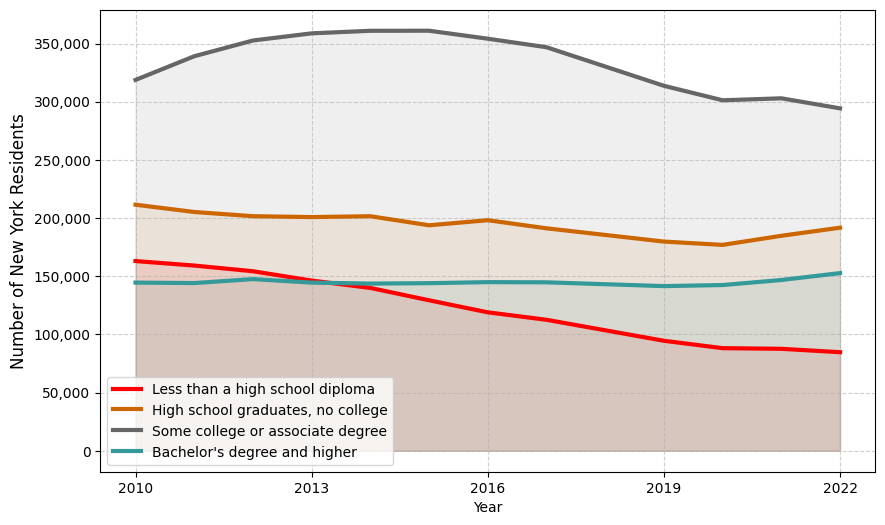

In [ ]:
# EDUCATIONAL ATTAINMENT LEVELS BY YEAR...

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(eduUnderHS18to24.index, eduUnderHS18to24['UNDERHS_AGE18to24'], label='Less than a high school diploma', color='#ff0000', linewidth=3)
ax.plot(eduGradHS18to24.index, eduGradHS18to24['GRAD_AGE18to24'], label='High school graduates, no college', color='#CC6600', linewidth=3)
ax.plot(eduCollege18to24.index, eduCollege18to24['COLLEGE_AGE18to24'], label='Some college or associate degree', color='#666666', linewidth=3)
ax.plot(eduBachelors18to24.index, eduBachelors18to24['BACHELORS_AGE18to24'], label="Bachelor's degree and higher", color='#339999', linewidth=3)

# Fill under the lines
ax.fill_between(eduUnderHS18to24.index, eduUnderHS18to24['UNDERHS_AGE18to24'], color='#ff0000', alpha=0.1)
ax.fill_between(eduGradHS18to24.index, eduGradHS18to24['GRAD_AGE18to24'], color='#CC6600', alpha=0.1)
ax.fill_between(eduCollege18to24.index, eduCollege18to24['COLLEGE_AGE18to24'], color='#666666', alpha=0.1)
ax.fill_between(eduBachelors18to24.index, eduBachelors18to24['BACHELORS_AGE18to24'], color='#339999', alpha=0.1)

ax.set_ylabel("Number of New York Residents", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.savefig('edu_plot_attainments.svg', format='svg')

plt.show()

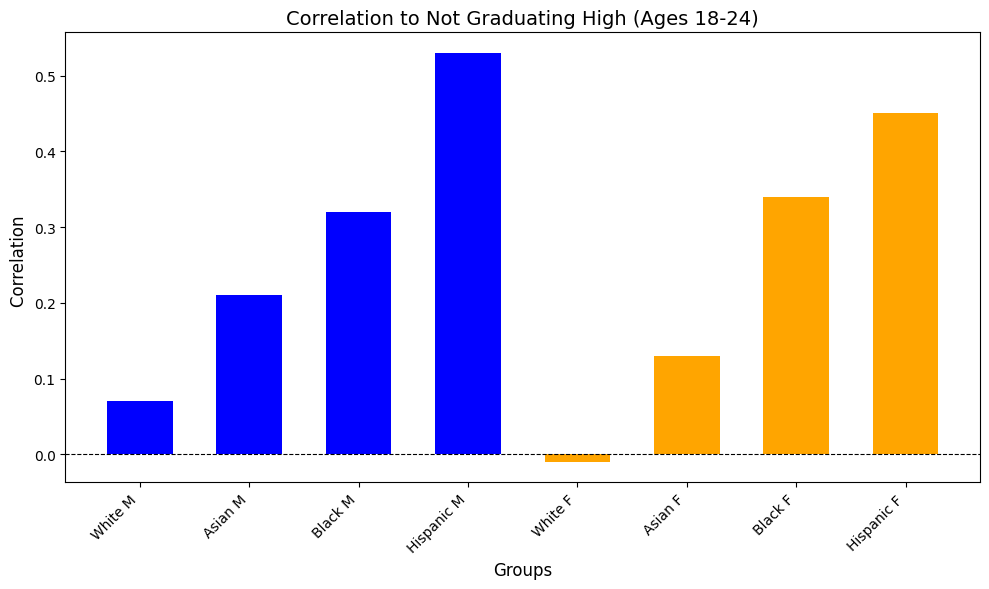

In [ ]:
# CORRELATION COEFFICIENT BY YEAR, AGES 18 to 24...
corrdata = {
    "Group": [
        "White M", "Asian M", "Black M", "Hispanic M",
        "White F", "Asian F", "Black F", "Hispanic F"
    ],
    "Correlation": [
        0.07, 0.21, 0.32, 0.53,
        -0.01, 0.13, 0.34, 0.45
    ]
}

# Create DataFrame
dfUnderHS = pd.DataFrame(corrdata)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
colors = ['blue' if 'M' in group else 'orange' for group in dfUnderHS['Group']]
ax.bar(dfUnderHS['Group'], dfUnderHS['Correlation'], color=colors, width=0.6)

# Add labels and title
ax.set_xlabel("Groups", fontsize=12)
ax.set_ylabel("Correlation ", fontsize=12)
ax.set_title("Correlation to Not Graduating High (Ages 18-24)", fontsize=14)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at 0

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In terms of experiencing a stop-and-frisk encounter before the age of 26, White and Asian young people of both sexes showed very weak or no correlation to their graduation from high school. Black young people showed a Moderate correlation (correlation coefficient 0.32 among men, and 0.33 among women) while Hispanic men showed a Strong correlation (0.53 among men, 0.44 among women).

* Very weak or no correlation (+/-0 to 0.1)
* Weak correlation (+/-0.1 to 0.3)
* Moderate correlation (+/-0.3 to 0.5)
* Strong correlation (+/-0.5 to 0.7)
* Very strong correlation (+/-0.7 to 1.0)

In other words, men and women of both of these racial groups - by far the largest segments targeted by the NYPD - appear to experience the greatest limiting impact on their future educational attainment. However, as stated earlier, as correlation is not an indiction of causation, many other factors could contribute to these educational results with or without a stop-and-frisk contact.

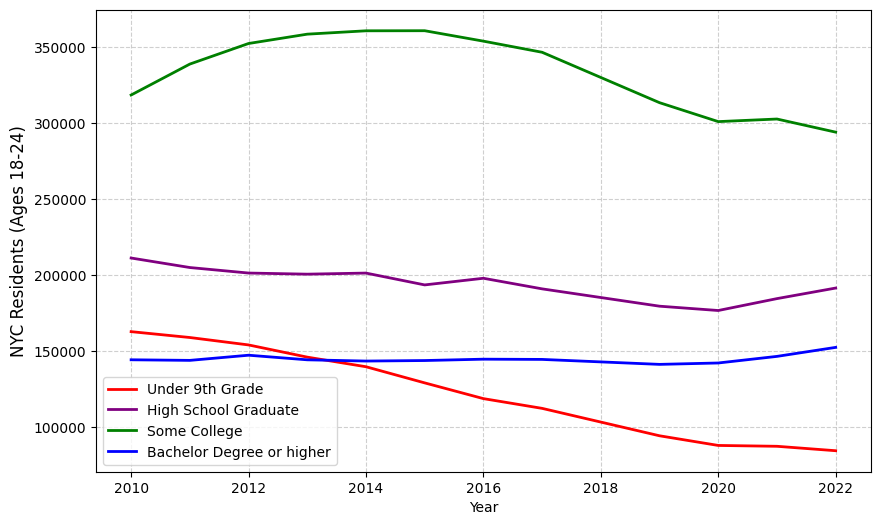

In [ ]:
# EDUCATIONAL ATTAINMENTS BY YEAR, AGES 18 to 24...

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(eduUnderHS18_24_by_year.index, eduUnderHS18_24_by_year['UNDERHS_AGE18to24'], label='Under 9th Grade', color='red', linewidth=2)
ax.plot(eduGradHS18_24_by_year.index,eduGradHS18_24_by_year['GRAD_AGE18to24'], label='High School Graduate', color='purple', linewidth=2)
ax.plot(eduCollege18_24_by_year.index, eduCollege18_24_by_year['COLLEGE_AGE18to24'], label='Some College', color='green', linewidth=2)
ax.plot(eduBachelors18_24_by_year.index, eduBachelors18_24_by_year['BACHELORS_AGE18to24'], label='Bachelor Degree or higher', color='blue', linewidth=2)

ax.set_ylabel("NYC Residents (Ages 18-24)", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)

plt.savefig('edu_plot_18_24.svg', format='svg')

plt.show()

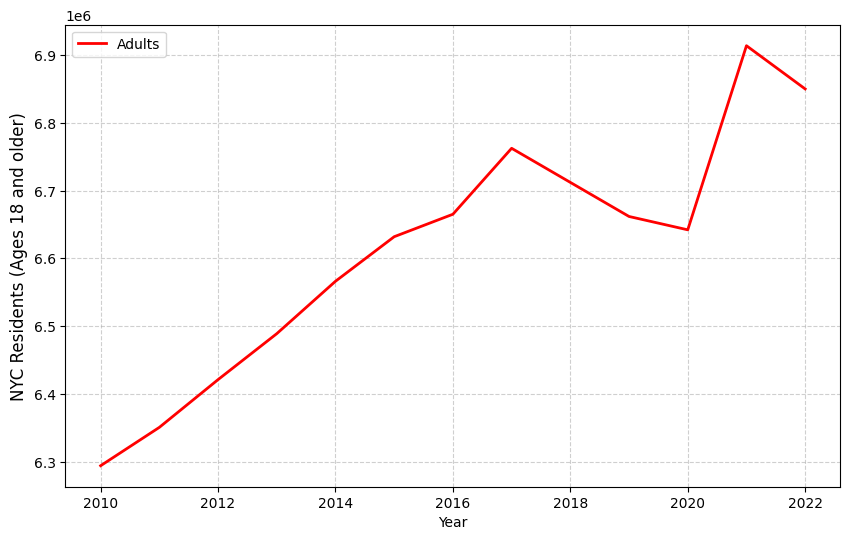

In [ ]:
# ADULT POPULATION CHART

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(eduAdults.index, eduAdults['POP_Adult'], label='Adults', color='red', linewidth=2)
# ax.plot(eduMales.index, eduMales['POP_Male'], label='Males', color='blue', linewidth=2)
# ax.plot(eduFemales.index, eduFemales['POP_Female'], label='Females', color='orange', linewidth=2)

ax.set_ylabel("NYC Residents (Ages 18 and older)", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)

plt.savefig('edu_plot_18_24.svg', format='svg')

plt.show()

Note that quantities in the above chart reflect changes in New York City's demographic age profiles more than impacts from NYPD encounters.

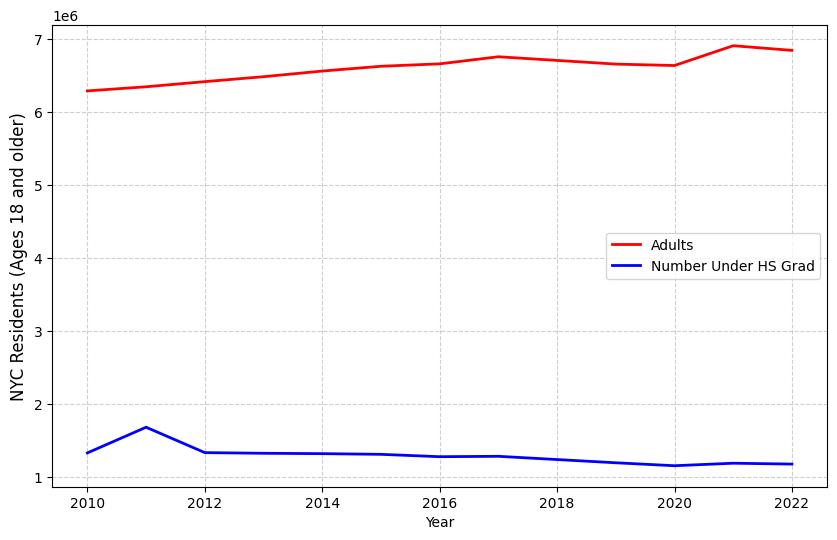

In [ ]:
# ADULT POPULATION CHART + EDUCATION

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(eduAdults.index, eduAdults['POP_Adult'], label='Adults', color='red', linewidth=2)
ax.plot(eduunderHS.index, eduunderHS['UNDERHS_ALL'], label='Number Under HS Grad', color='blue', linewidth=2)
# ax.plot(eduFemales.index, eduFemales['POP_Female'], label='Females', color='orange', linewidth=2)

ax.set_ylabel("NYC Residents (Ages 18 and older)", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)

plt.savefig('edu_plot_18_24.svg', format='svg')

plt.show()

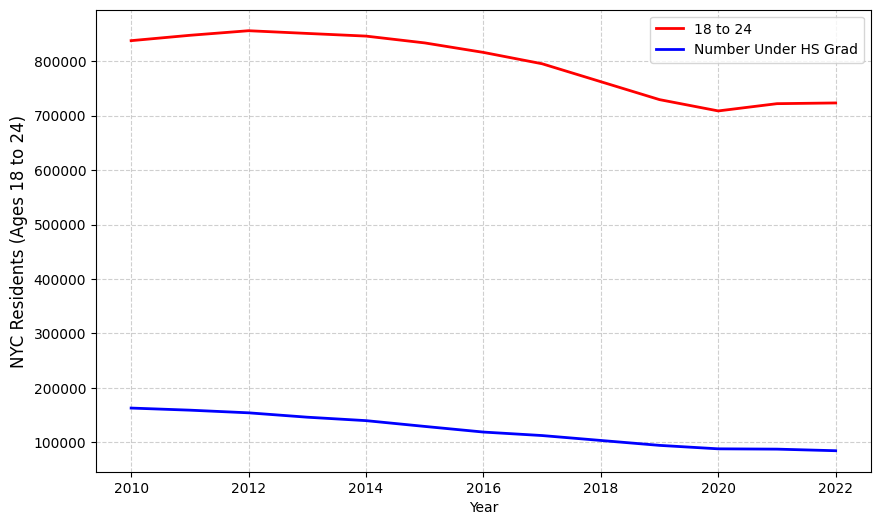

In [ ]:
# ADULT POPULATION CHART + EDUCATION, FOCUS ON 18 TO 24

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(edupop_18_24_years.index, edupop_18_24_years['POP_AGE18_24'], label='18 to 24', color='red', linewidth=2)
ax.plot(eduUnderHS18_24_by_year.index, eduUnderHS18_24_by_year['UNDERHS_AGE18to24'], label='Number Under HS Grad', color='blue', linewidth=2)
# ax.plot(eduFemales.index, eduFemales['POP_Female'], label='Females', color='orange', linewidth=2)

ax.set_ylabel("NYC Residents (Ages 18 to 24)", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)

plt.savefig('edu_plot_18_24.svg', format='svg')

plt.show()

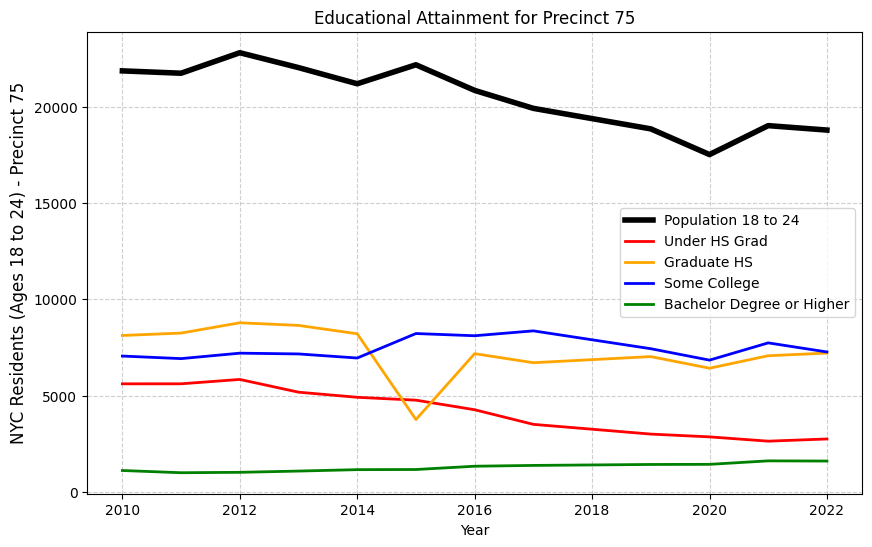

In [ ]:
# Filter data for precinct 75
df_precinct_75 = df[df['PRECINCT'] == 75]

#Recalculate with the filtered data
edupop_18_24_years = df_precinct_75.groupby('YEAR')['POP_AGE18_24'].sum()
eduUnderHS18_24_by_year = df_precinct_75.groupby('YEAR')['UNDERHS_AGE18to24'].sum()
eduGRADHS_18_24_by_year = df_precinct_75.groupby('YEAR')['GRAD_AGE18to24'].sum()
eduCOLLEGE_18_24_by_year = df_precinct_75.groupby('YEAR')['COLLEGE_AGE18to24'].sum()
eduBACHELORS_18_24_by_year = df_precinct_75.groupby('YEAR')['BACHELORS_AGE18to24'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(edupop_18_24_years.index, edupop_18_24_years, label='Population 18 to 24', color='black', linewidth=4)
ax.plot(eduUnderHS18_24_by_year.index, eduUnderHS18_24_by_year, label='Under HS Grad', color='red', linewidth=2)
ax.plot(eduGRADHS_18_24_by_year.index, eduGRADHS_18_24_by_year, label='Graduate HS', color='orange', linewidth=2)
ax.plot(eduCOLLEGE_18_24_by_year.index, eduCOLLEGE_18_24_by_year, label='Some College', color='blue', linewidth=2)
ax.plot(eduBACHELORS_18_24_by_year.index, eduBACHELORS_18_24_by_year, label='Bachelor Degree or Higher', color='green', linewidth=2)

ax.set_ylabel("NYC Residents (Ages 18 to 24) - Precinct 75", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)
plt.title("Educational Attainment for Precinct 75") #Add a title
plt.savefig('edu_plot_18_24_precinct_75.svg', format='svg')
plt.show()



---

**NYPD STOP-AND-FRISK INCIDENT TALLY CHARTS**

In [ ]:
# Total NYPD stop-and-frisk stops 2003-2022, all precincts by year, niche tallies...
NYPDsqf_by_year_males = dfNYPD.groupby('YEAR') [["SQF_SEXM"]].sum()
NYPDsqf_by_year_females = dfNYPD.groupby('YEAR') [["SQF_SEXF"]].sum()
NYPDsqf_by_year_other = dfNYPD.groupby('YEAR') [["SQF_SEXZ"]].sum()
NYPDsqf_by_year_asians = round(dfNYPD.groupby('YEAR') [["SQF_RACEASIAN"]].sum(),0)
NYPDsqf_by_year_blacks = round(dfNYPD.groupby('YEAR') [["SQF_RACEBLACK"]].sum(),0)
# Creating 'SQF_RACEHISPANIC' column in dfNYPD
dfNYPD["SQF_RACEHISPANIC"] = dfNYPD["SQF_RACEHISPB"] + dfNYPD["SQF_RACEHISPW"]
NYPDsqf_by_year_hispanics = round(dfNYPD.groupby('YEAR') [["SQF_RACEHISPANIC"]].sum(),0) # Now this line should work
NYPDsqf_by_year_whites = round(dfNYPD.groupby('YEAR') [["SQF_RACEWHITE"]].sum(),0)
NYPDsqf_by_year_age0_17 = dfNYPD.groupby('YEAR') [["SQF_AGE0_17"]].sum()
NYPDsqf_by_year_age18_24 = dfNYPD.groupby('YEAR') [["SQF_AGE18_24"]].sum()
NYPDsqf_by_year_age25_34 = dfNYPD.groupby('YEAR') [["SQF_AGE25_34"]].sum()
NYPDsqf_by_year_age35_44 = dfNYPD.groupby('YEAR') [["SQF_AGE35_44"]].sum()
NYPDsqf_by_year_age45_64 = dfNYPD.groupby('YEAR') [["SQF_AGE45_64"]].sum()
NYPDsqf_by_year_age65older = dfNYPD.groupby('YEAR') [["SQF_AGE65_older"]].sum()

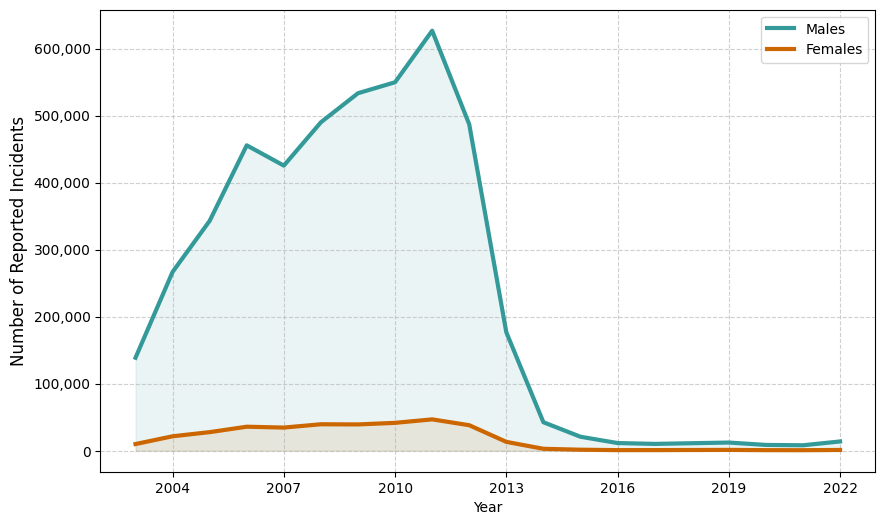

In [ ]:
# NYPD SQF line chart by SEX...

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(NYPDsqf_by_year_males.index, NYPDsqf_by_year_males['SQF_SEXM'], label='Males', color='#339999', linewidth=3)
ax.plot(NYPDsqf_by_year_females.index, NYPDsqf_by_year_females['SQF_SEXF'], label='Females', color='#CC6600', linewidth=3)

# Fill under the lines
ax.fill_between(NYPDsqf_by_year_males.index, NYPDsqf_by_year_males['SQF_SEXM'], color='#339999', alpha=0.1)
ax.fill_between(NYPDsqf_by_year_females.index, NYPDsqf_by_year_females['SQF_SEXF'], color='#CC6600', alpha=0.1)

ax.set_ylabel("Number of Reported Incidents", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.savefig('nypd_plot_sex.svg', format='svg')

plt.show()

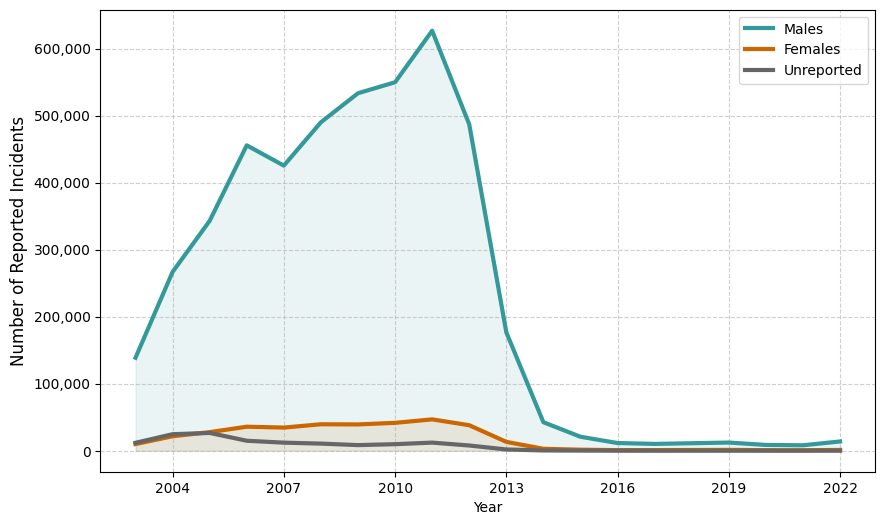

In [ ]:
# NYPD SQF line chart by SEX...

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(NYPDsqf_by_year_males.index, NYPDsqf_by_year_males['SQF_SEXM'], label='Males', color='#339999', linewidth=3)
ax.plot(NYPDsqf_by_year_females.index, NYPDsqf_by_year_females['SQF_SEXF'], label='Females', color='#CC6600', linewidth=3)
ax.plot(NYPDsqf_by_year_other.index, NYPDsqf_by_year_other['SQF_SEXZ'], label='Unreported', color='#666666', linewidth=3)

# Fill under the lines
ax.fill_between(NYPDsqf_by_year_males.index, NYPDsqf_by_year_males['SQF_SEXM'], color='#339999', alpha=0.1)
ax.fill_between(NYPDsqf_by_year_females.index, NYPDsqf_by_year_females['SQF_SEXF'], color='#CC6600', alpha=0.1)

ax.set_ylabel("Number of Reported Incidents", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.savefig('nypd_plot_sex.svg', format='svg')

plt.show()

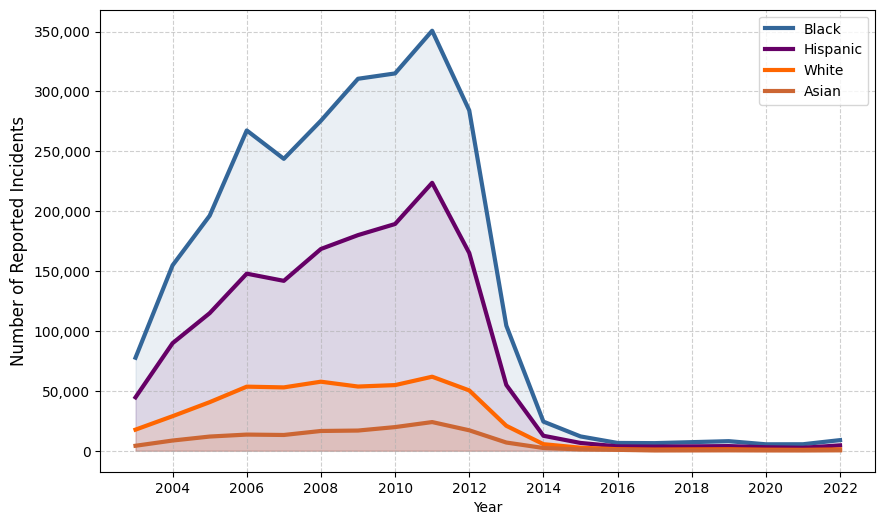

In [ ]:
# NYPD SQF line chart by RACE...

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(NYPDsqf_by_year_blacks.index, NYPDsqf_by_year_blacks['SQF_RACEBLACK'], label='Black', color='#336699', linewidth=3)
ax.plot(NYPDsqf_by_year_hispanics.index, NYPDsqf_by_year_hispanics['SQF_RACEHISPANIC'], label='Hispanic', color='#660066', linewidth=3)
ax.plot(NYPDsqf_by_year_whites.index, NYPDsqf_by_year_whites['SQF_RACEWHITE'], label='White', color='#FF6600', linewidth=3)
ax.plot(NYPDsqf_by_year_asians.index, NYPDsqf_by_year_asians['SQF_RACEASIAN'], label='Asian', color='#CC6633', linewidth=3)

# Fill under the lines
ax.fill_between(NYPDsqf_by_year_blacks.index, NYPDsqf_by_year_blacks['SQF_RACEBLACK'], color='#336699', alpha=0.1)
ax.fill_between(NYPDsqf_by_year_hispanics.index, NYPDsqf_by_year_hispanics['SQF_RACEHISPANIC'], color='#660066', alpha=0.1)
ax.fill_between(NYPDsqf_by_year_whites.index, NYPDsqf_by_year_whites['SQF_RACEWHITE'], color='#FF6600', alpha=0.1)
ax.fill_between(NYPDsqf_by_year_asians.index, NYPDsqf_by_year_asians['SQF_RACEASIAN'], color='#CC6633', alpha=0.1)

# Set axis labels and legend
ax.set_ylabel("Number of Reported Incidents", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.legend()

# Grid and formatting
ax.grid(True, linestyle='--', alpha=0.6)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Set x-axis limits and format
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))  # Show every 2 years for better spacing
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

# Save and show the plot
plt.savefig('nypd_plot_race.svg', format='svg')
plt.show()


In [ ]:
print(NYPDsqf_by_year_blacks.index.min(), NYPDsqf_by_year_blacks.index.max())


2003.0 2022.0


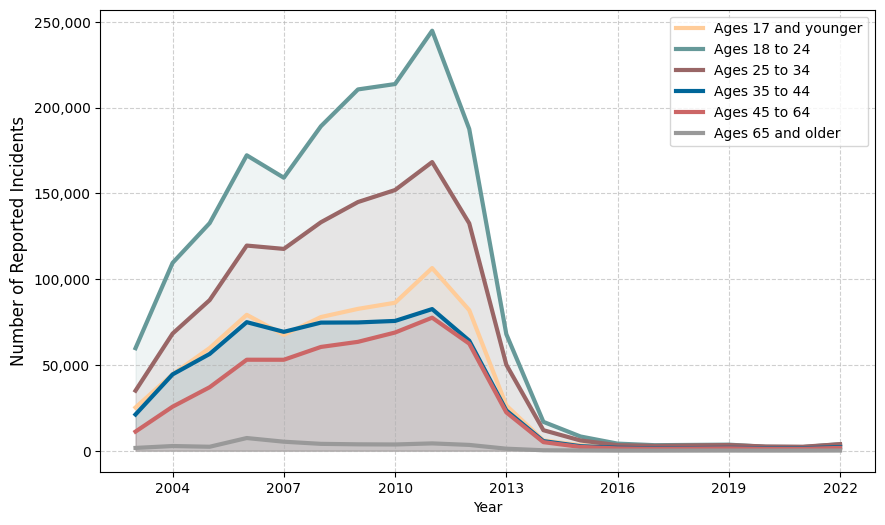

In [ ]:
# NYPD SQF line chart by AGE BIN...

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(NYPDsqf_by_year_age0_17.index, NYPDsqf_by_year_age0_17['SQF_AGE0_17'], label='Ages 17 and younger', color='#ffcc99', linewidth=3)
ax.plot(NYPDsqf_by_year_age18_24.index, NYPDsqf_by_year_age18_24['SQF_AGE18_24'], label='Ages 18 to 24', color='#669999', linewidth=3)
ax.plot(NYPDsqf_by_year_age25_34.index, NYPDsqf_by_year_age25_34['SQF_AGE25_34'], label='Ages 25 to 34', color='#996666', linewidth=3)
ax.plot(NYPDsqf_by_year_age35_44.index, NYPDsqf_by_year_age35_44['SQF_AGE35_44'], label='Ages 35 to 44', color='#006699', linewidth=3)
ax.plot(NYPDsqf_by_year_age45_64.index, NYPDsqf_by_year_age45_64['SQF_AGE45_64'], label='Ages 45 to 64', color='#cc6666', linewidth=3)
ax.plot(NYPDsqf_by_year_age65older.index, NYPDsqf_by_year_age65older['SQF_AGE65_older'], label='Ages 65 and older', color='#999999', linewidth=3)

ax.fill_between(NYPDsqf_by_year_age0_17.index, NYPDsqf_by_year_age0_17['SQF_AGE0_17'], color='#ffcc99', alpha=0.1)
ax.fill_between(NYPDsqf_by_year_age18_24.index, NYPDsqf_by_year_age18_24['SQF_AGE18_24'], color='#669999', alpha=0.1)
ax.fill_between(NYPDsqf_by_year_age25_34.index, NYPDsqf_by_year_age25_34['SQF_AGE25_34'], color='#996666', alpha=0.1)
ax.fill_between(NYPDsqf_by_year_age35_44.index, NYPDsqf_by_year_age35_44['SQF_AGE35_44'], color='#006699', alpha=0.1)
ax.fill_between(NYPDsqf_by_year_age45_64.index, NYPDsqf_by_year_age45_64['SQF_AGE45_64'], color='#cc6666', alpha=0.1)
ax.fill_between(NYPDsqf_by_year_age65older.index, NYPDsqf_by_year_age65older['SQF_AGE65_older'], color='#999999', alpha=0.1)

ax.set_ylabel("Number of Reported Incidents", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.savefig('nypd_plot_age.svg', format='svg')

plt.show()

In [ ]:
# grabbing graphics files to clean up manually...
from google.colab import files
#files.download('nypd_plot_sex.svg')
#files.download('nypd_plot_race.svg')
#files.download('nypd_plot_age.svg')
files.download('edu_plot_attainments.svg')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---

RANDOM NOTES BELOW HERE

In [ ]:
df.to_csv('df_all.csv', index=True)
from google.colab import files
files.download('df_all.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df["TEST"] = df['YEAR'].corr(df['UNDERHS_AGE18to24'])
print(df["TEST"])

0      -0.285796
1      -0.285796
2      -0.285796
3      -0.285796
4      -0.285796
          ...   
998    -0.285796
999    -0.285796
1000   -0.285796
1001   -0.285796
1002   -0.285796
Name: TEST, Length: 1003, dtype: float64


<ipython-input-39-66a706d136ab>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["TEST"] = df['YEAR'].corr(df['UNDERHS_AGE18to24'])


In [ ]:
# A quick linear regression model suggests a strong link between NYPD stop-and-frisk stops in the up to 25 and lack of completing high school.
Y = df['SQF_AGEYOUTH']
X = df['UNDERHS_AGE18to24']
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:           SQF_AGEYOUTH   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     263.0
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           3.21e-52
Time:                        05:49:57   Log-Likelihood:                -8303.8
No. Observations:                 924   AIC:                         1.661e+04
Df Residuals:                     922   BIC:                         1.662e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -126.4645    102.14

In [ ]:
X = df['SQF_RACEBLACK']
Y = df['UNDERHS_AGE18to24']
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:      UNDERHS_AGE18to24   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           8.20e-26
Time:                        05:58:26   Log-Likelihood:                -7864.6
No. Observations:                 924   AIC:                         1.573e+04
Df Residuals:                     922   BIC:                         1.574e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1404.7095     43.526     32.273

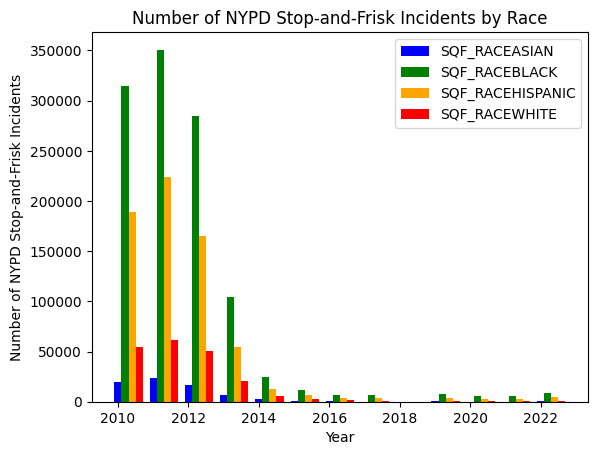

In [ ]:
# familiar bar chart of SQF incidents by race...
categories = ['SQF_RACEASIAN', 'SQF_RACEBLACK', 'SQF_RACEHISPANIC', 'SQF_RACEWHITE'] # Changed categories to the actual column names in df
bar_width = 0.2
colors = ['blue', 'green', 'orange', 'red']
fig, ax = plt.subplots()
grouped_data = df.groupby('YEAR')[categories].sum().reset_index()
for i, (category, color) in enumerate(zip(categories, colors)):
    ax.bar(grouped_data['YEAR'] + bar_width * i, grouped_data[category], width=bar_width, color=color, label=category)
ax.set_xlabel('Year')
ax.set_ylabel('Number of NYPD Stop-and-Frisk Incidents')
ax.set_title('Number of NYPD Stop-and-Frisk Incidents by Race')
ax.legend()
plt.show()

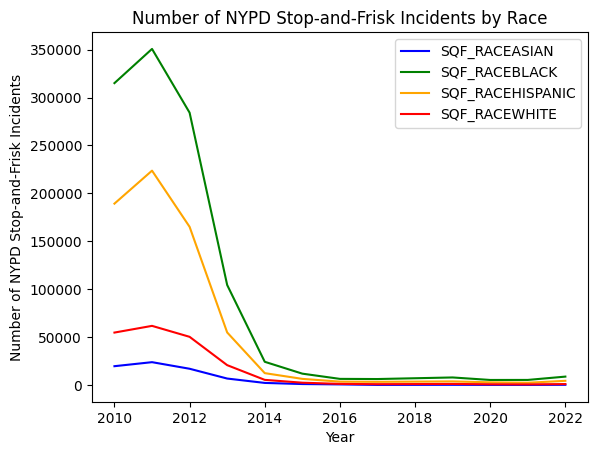

In [ ]:
# ...or by line chart (2010 onward to match with educational data?):
categories = ['SQF_RACEASIAN', 'SQF_RACEBLACK', 'SQF_RACEHISPANIC', 'SQF_RACEWHITE']
colors = ['blue', 'green', 'orange', 'red']
fig, ax = plt.subplots()
grouped_data = df.groupby('YEAR')[categories].sum().reset_index()
for category, color in zip(categories, colors):
    ax.plot(grouped_data['YEAR'], grouped_data[category], color=color, label=category)
ax.set_xlabel('Year')
ax.set_ylabel('Number of NYPD Stop-and-Frisk Incidents')
ax.set_title('Number of NYPD Stop-and-Frisk Incidents by Race')
ax.legend()
plt.show()

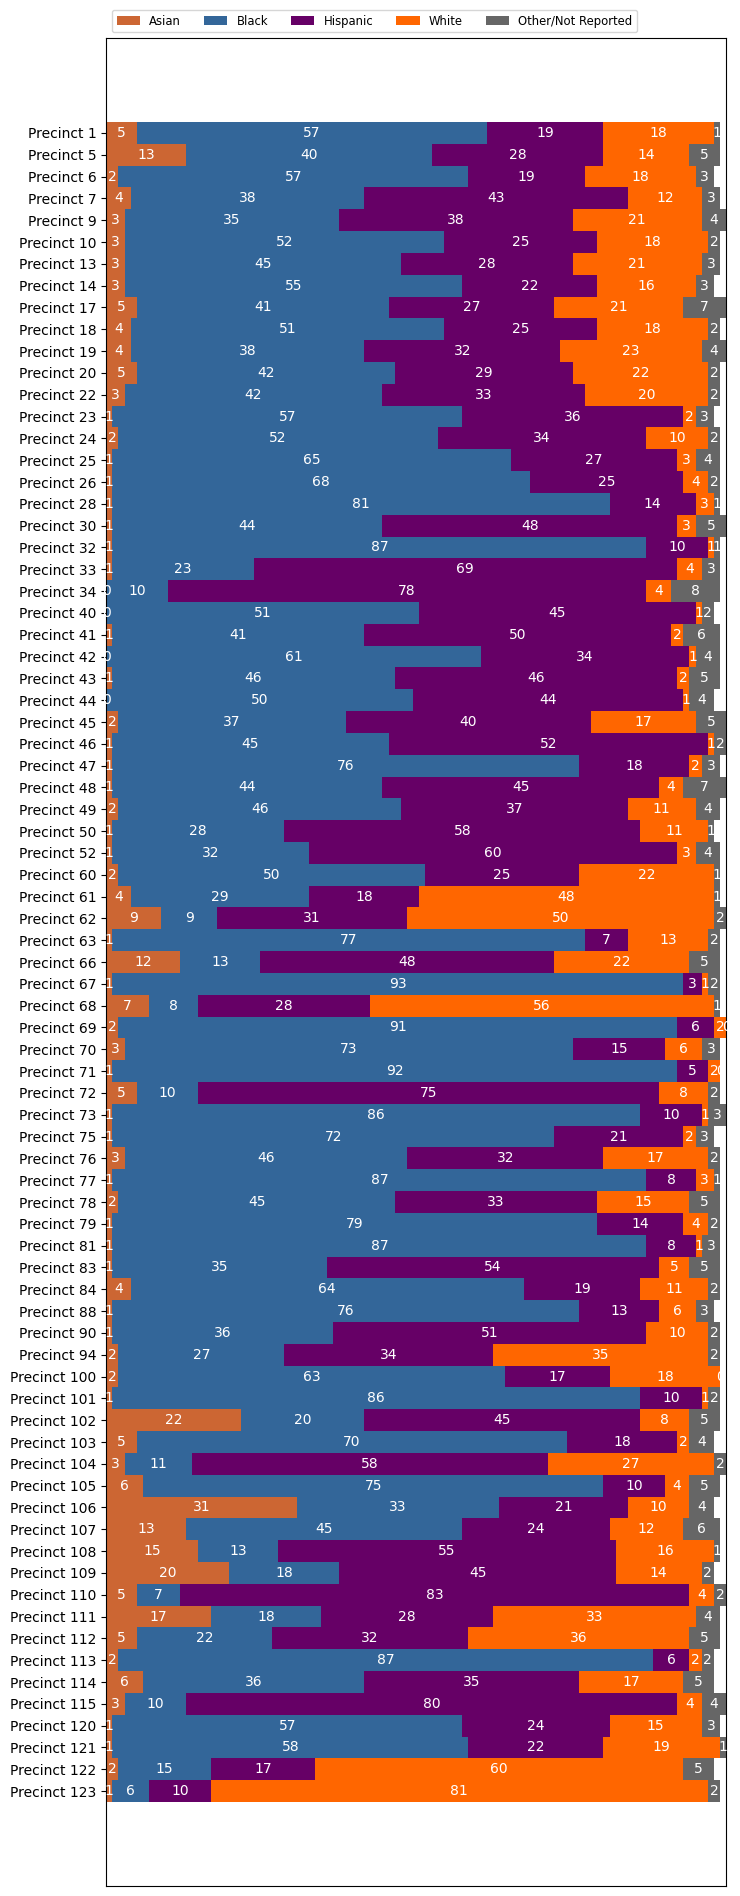

In [ ]:

	category_names = ['Asian', 'Black', 'Hispanic', 'White', 'Other/Not Reported']
	category_colors = ['#CC6633', '#336699', '#660066', '#FF6600', '#666666']

	results = {
	'Precinct 1': [5, 57, 19, 18, 1],
	'Precinct 5': [13, 40, 28, 14, 5],
	'Precinct 6': [2, 57, 19, 18, 3],
	'Precinct 7': [4, 38, 43, 12, 3],
	'Precinct 9': [3, 35, 38, 21, 4],
	'Precinct 10': [3, 52, 25, 18, 2],
	'Precinct 13': [3, 45, 28, 21, 3],
	'Precinct 14': [3, 55, 22, 16, 3],
	'Precinct 17': [5, 41, 27, 21, 7],
	'Precinct 18': [4, 51, 25, 18, 2],
	'Precinct 19': [4, 38, 32, 23, 4],
	'Precinct 20': [5, 42, 29, 22, 2],
	'Precinct 22': [3, 42, 33, 20, 2],
	'Precinct 23': [1, 57, 36, 2, 3],
	'Precinct 24': [2, 52, 34, 10, 2],
	'Precinct 25': [1, 65, 27, 3, 4],
	'Precinct 26': [1, 68, 25, 4, 2],
	'Precinct 28': [1, 81, 14, 3, 1],
	'Precinct 30': [1, 44, 48, 3, 5],
	'Precinct 32': [1, 87, 10, 1, 1],
	'Precinct 33': [1, 23, 69, 4, 3],
	'Precinct 34': [0, 10, 78, 4, 8],
	'Precinct 40': [0, 51, 45, 1, 2],
	'Precinct 41': [1, 41, 50, 2, 6],
	'Precinct 42': [0, 61, 34, 1, 4],
	'Precinct 43': [1, 46, 46, 2, 5],
	'Precinct 44': [0, 50, 44, 1, 4],
	'Precinct 45': [2, 37, 40, 17, 5],
	'Precinct 46': [1, 45, 52, 1, 2],
	'Precinct 47': [1, 76, 18, 2, 3],
	'Precinct 48': [1, 44, 45, 4, 7],
	'Precinct 49': [2, 46, 37, 11, 4],
	'Precinct 50': [1, 28, 58, 11, 1],
	'Precinct 52': [1, 32, 60, 3, 4],
	'Precinct 60': [2, 50, 25, 22, 1],
	'Precinct 61': [4, 29, 18, 48, 1],
	'Precinct 62': [9, 9, 31, 50, 2],
	'Precinct 63': [1, 77, 7, 13, 2],
	'Precinct 66': [12, 13, 48, 22, 5],
	'Precinct 67': [1, 93, 3, 1, 2],
	'Precinct 68': [7, 8, 28, 56, 1],
	'Precinct 69': [2, 91, 6, 2, 0],
	'Precinct 70': [3, 73, 15, 6, 3],
	'Precinct 71': [1, 92, 5, 2, 0],
	'Precinct 72': [5, 10, 75, 8, 2],
	'Precinct 73': [1, 86, 10, 1, 3],
	'Precinct 75': [1, 72, 21, 2, 3],
	'Precinct 76': [3, 46, 32, 17, 2],
	'Precinct 77': [1, 87, 8, 3, 1],
	'Precinct 78': [2, 45, 33, 15, 5],
	'Precinct 79': [1, 79, 14, 4, 2],
	'Precinct 81': [1, 87, 8, 1, 3],
	'Precinct 83': [1, 35, 54, 5, 5],
	'Precinct 84': [4, 64, 19, 11, 2],
	'Precinct 88': [1, 76, 13, 6, 3],
	'Precinct 90': [1, 36, 51, 10, 2],
	'Precinct 94': [2, 27, 34, 35, 2],
	'Precinct 100': [2, 63, 17, 18, 0],
	'Precinct 101': [1, 86, 10, 1, 2],
	'Precinct 102': [22, 20, 45, 8, 5],
	'Precinct 103': [5, 70, 18, 2, 4],
	'Precinct 104': [3, 11, 58, 27, 2],
	'Precinct 105': [6, 75, 10, 4, 5],
	'Precinct 106': [31, 33, 21, 10, 4],
	'Precinct 107': [13, 45, 24, 12, 6],
	'Precinct 108': [15, 13, 55, 16, 1],
	'Precinct 109': [20, 18, 45, 14, 2],
	'Precinct 110': [5, 7, 83, 4, 2],
	'Precinct 111': [17, 18, 28, 33, 4],
	'Precinct 112': [5, 22, 32, 36, 5],
	'Precinct 113': [2, 87, 6, 2, 2],
	'Precinct 114': [6, 36, 35, 17, 5],
	'Precinct 115': [3, 10, 80, 4, 4],
	'Precinct 120': [1, 57, 24, 15, 3],
	'Precinct 121': [1, 58, 22, 19, 1],
	'Precinct 122': [2, 15, 17, 60, 5],
	'Precinct 123': [1, 6, 10, 81, 2,]
	}

	def survey(results, category_names, category_colors):
	    """
	    Parameters
	    ----------
	    results : dict
	        A mapping from question labels to a list of answers per category.
	    category_names : list of str
	        The category labels.
	    category_colors : list of str
	        List of hex color codes for each category.
	    """
	    labels = list(results.keys())
	    data = np.array(list(results.values()))
	    data_cum = data.cumsum(axis=1)

	    fig, ax = plt.subplots(figsize=(8, 24))
	    ax.invert_yaxis()
	    ax.xaxis.set_visible(False)
	    ax.set_xlim(0, np.sum(data, axis=1).max())

	    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
	        widths = data[:, i]
	        starts = data_cum[:, i] - widths
	        rects = ax.barh(labels, widths, left=starts, height=1.0,
	                        label=colname, color=color)

	        ax.bar_label(rects, label_type='center', color='white')

	    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
	              loc='lower left', fontsize='small')

	    return fig, ax

	survey(results, category_names, category_colors)
	plt.show()
